In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [482]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = 100

## –ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –∫—É—Ä—Å–æ–≤–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞

### –¶–µ–ª—å –∫—É—Ä—Å–æ–≤–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞

**–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∏ –æ—Å—Ç–∞—Ç–∫–∞—Ö –∫–æ–º–ø–∞–Ω–∏–∏.**
* –°–¥–µ–ª–∞—Ç—å –∫—Ä–∞—Ç–∫—É—é —Å–≤–æ–¥–∫—É –æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –ø—Ä–æ–¥–∞–∂.
* –ü–æ–∫–∞–∑–∞—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ –≤–∞–ª–æ–≤—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–æ–º–ø–∞–Ω–∏–∏ –≤ –¥–∏–Ω–∞–º–∏–∫–µ.
* –ü—Ä–æ–≤–µ—Å—Ç–∏ ABC-–∞–Ω–∞–ª–∏–∑ –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º, –ø–æ–∫–∞–∑–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂.

**–ü—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**  
* –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ –∫–æ–º–ø–∞–Ω–∏–∏, —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º –∏ —Ç–æ–≤–∞—Ä–∞–º.
* –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ü–æ–∫–∞–∑–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö.
* –ü—Ä–æ–≤–µ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫—É –∏ –æ—á–∏—Å—Ç–∫—É "–ø–ª–æ—Ö–∏—Ö" –¥–∞–Ω–Ω—ã—Ö. –î–æ–ø–æ–ª–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∞–º–∏ –≤ –ø–µ—Ä–∏–æ–¥—ã –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è —Ç–æ–≤–∞—Ä–∞ –Ω–∞ —Å–∫–ª–∞–¥–∞—Ö, —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ–∑–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã –∏ —Ç.–¥.
* –ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –æ—á–∏—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –ø—Ä–æ–¥–∞–∂ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–æ–≤–∞—Ä–∞, —Ç–æ–≤–∞—Ä–Ω–æ–π –≥—Ä—É–ø–ø—ã –∏ –∫–æ–º–ø–∞–Ω–∏–∏ –≤ —Ü–µ–ª–æ–º –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π —Å–∫–≤–æ–∑–Ω–æ–π –≥–æ–¥ (–æ–∫—Ç—è–±—Ä—å 2020 - —Å–µ–Ω—Ç—è–±—Ä—å 2021). 
* –î–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤–Ω–æ–π –º–æ–¥–µ–ª–∏ - –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —Å–æ–≤–º–µ—Å—Ç–Ω–æ —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏.
* –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–æ–≥–Ω–æ–∑–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –∏ –≤ —Ç–∞–±–ª–∏—Ü–∞—Ö.

**–°–¥–µ–ª–∞—Ç—å –æ–±—â–∏–µ –≤—ã–≤–æ–¥—ã –∏ –ø—Ä–æ–≤–µ—Å—Ç–∏ –æ—Ü–µ–Ω–∫—É –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏**

### –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

**–û—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Å–µ—Ç**

–î–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞ —Å–∫–æ–ª—å–∑—è—â–∏–µ 2 –≥–æ–¥–∞ –ø–æ –º–µ—Å—è—Ü–∞–º (–¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è –¥–æ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤)
–ü–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö - –æ–∫—Ç—è–±—Ä—å 2018 - —Å–µ–Ω—Ç—è–±—Ä—å 2020

–¢–æ–≤–∞—Ä–Ω—ã–µ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
* –ë—Ä–µ–Ω–¥
* –ö–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞
* –¢–æ–≤–∞—Ä–Ω–∞—è –≥—Ä—É–ø–ø–∞
* –ú–æ–¥–µ–ª—å
* –ê—Ä—Ç–∏–∫—É–ª
* –°—Ç–∞—Ç—É—Å —Ç–æ–≤–∞—Ä–∞ - –µ–≥–æ –∂–∏–∑–Ω–µ–Ω–Ω—ã–π —Ü–∏–∫–ª (–ù–æ–≤—ã–π, –î–µ–π—Å—Ç–≤—É–µ—Ç, –û—Ç–º–µ–Ω–µ–Ω)

–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
* –ì–æ–¥
* –ú–µ—Å—è—Ü
* –ù–æ–º–µ—Ä –ø–µ—Ä–∏–æ–¥–∞ –∏ —Ç.–¥.

–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ:
* –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–æ (—à—Ç—É–∫–∏)
* –û–±–æ—Ä–æ—Ç (—Ä—É–±)
* –°–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ (—Ä—É–±)
* –°—Ä–µ–¥–Ω–∏–π —Ç–æ–≤–∞—Ä–Ω—ã–π –∑–∞–ø–∞—Å (—à—Ç—É–∫–∏)
* –°—Ä–µ–¥–Ω–∏–π —Ç–æ–≤–∞—Ä–Ω—ã–π –∑–∞–ø–∞—Å (—Ä—É–±)

**–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã**

* –î–∞–Ω–Ω—ã–µ —Å —Å–µ–∑–æ–Ω–Ω—ã–º–∏ –∏–Ω–¥–µ–∫—Å–∞–º–∏ –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º (—Å–æ–±—Ä–∞–Ω—ã —Å –Ø–Ω–¥–µ–∫—Å Wordstat)
* –¢–∞–±–ª–∏—Ü–∞ - –∫–∞–ª–µ–Ω–¥–∞—Ä—å –ø–æ –º–µ—Å—è—Ü–∞–º –∑–∞ —Ç—Ä–∏ –≥–æ–¥–∞. –î–≤–∞ –≥–æ–¥–∞ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö (–∫–∞–∫ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ) –∏ –±—É–¥—É—â–∏–π –≥–æ–¥, —Ç–æ–∂–µ —Å–∫–æ–ª—å–∑—è—â–∏–π, –æ–∫—Ç—è–±—Ä—å 2020 - —Å–µ–Ω—Ç—è–±—Ä—å 2021 (–¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø–ª–∞–Ω–∞)


In [483]:
# –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∏ –æ—Å—Ç–∞—Ç–∫–∞—Ö
df_data   = pd.read_excel('data_source_sales_and_balances.xlsx', sheet_name = 'Sales_and_Balances')

# –°–µ–∑–æ–Ω–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø–∞–º (–¥–∞–Ω–Ω—ã–µ, —Å–æ–±—Ä–∞–Ω–Ω—ã–µ —Å –Ø–Ω–¥–µ–∫—Å Wordstat)
df_season = pd.read_excel('data_source_sales_and_balances.xlsx', sheet_name = 'Season_Index')

# –ü–µ—Ä–∏–æ–¥—ã –§–∞–∫—Ç - –ü–ª–∞–Ω
df_period = pd.read_excel('data_source_sales_and_balances.xlsx', sheet_name = 'Period')

## –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [484]:
df_data.shape, df_data.columns

((5739, 19),
 Index(['brand', 'product_category', 'product_group', 'model', 'articul',
        'status_purchase', 'yr', 'mn', 'yr_mn', 'period_id', 'yr_number',
        'cnt_days', 'ndays_outofstock', 'proc_instock', 'qnt_balance',
        'sm_balance', 'qnt_sale', 'sm_sale', 'sm_cost'],
       dtype='object'))

In [485]:
df_data.head(10)

brand product_category                 product_group      model   articul  \
0  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
1  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
2  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
3  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
4  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
5  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
6  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
7  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
8  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   
9  BORT  –ë—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞  –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤  Alligator  93410754   

  status_purchase    yr  mn    yr_mn  period_id  yr_number  cnt_days  \
0       –î–ï–ô–°–¢–í–£–ï–¢  2019  10  2019-10         13          2         8   
1       –î–ï–ô–°–¢–í–£–ï–¢  2019  11  2019-11         14          2        30   
2       –î–ï–ô–°–¢–í–£–ï–¢  2019  12  2019-12         15          2        31   
3       –î–ï–ô–°–¢–í–£–ï–¢  2020   1  2020-01         16          2        31   
4       –î–ï–ô–°–¢–í–£–ï–¢  2020   2  2020-02         17          2        29   
5       –î–ï–ô–°–¢–í–£–ï–¢  2020   3  2020-03         18          2        31   
6       –î–ï–ô–°–¢–í–£–ï–¢  2020   4  2020-04         19          2        30   
7       –î–ï–ô–°–¢–í–£–ï–¢  2020   5  2020-05         20          2        31   
8       –î–ï–ô–°–¢–í–£–ï–¢  2020   6  2020-06         21          2        30   
9       –î–ï–ô–°–¢–í–£–ï–¢  2020   7  2020-07         22          2        31   

   ndays_outofstock  proc_instock  qnt_balance  sm_balance  qnt_sale  sm_sale  \
0                 1         0.875           88      464799         0        0   
1                 0         1.000           51      307131         1    13512   
2                 0         1.000           63      373584        11   103453   
3                 0         1.000           88      525433        12   136964   
4                 0         1.000           81      490153        20   186363   
5                 0         1.000           75      514409        11   168622   
6                 0         1.000           72      511393         5    74160   
7                 0         1.000           68      462181        18   198533   
8                 0         1.000           57      362329        22   227026   
9                 0         1.000           50      325924        23   251093   

   sm_cost  
0        0  
1     7236  
2    71419  
3    86512  
4   128519  
5    89361  
6    41818  
7   136737  
8   152755  
9   169078

### –û–±—â–∞—è –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞

In [486]:
df_data.describe()

articul           yr           mn    period_id   yr_number  \
count  5.739000e+03  5739.000000  5739.000000  5739.000000  5739.00000   
mean   9.375442e+07  2019.320788     6.451472    13.300924     1.55027   
std    2.826610e+06     0.641380     3.385977     6.786226     0.49751   
min    9.120447e+07  2018.000000     1.000000     1.000000     1.00000   
25%    9.127404e+07  2019.000000     4.000000     8.000000     1.00000   
50%    9.341057e+07  2019.000000     6.000000    14.000000     2.00000   
75%    9.829000e+07  2020.000000     9.000000    19.000000     2.00000   
max    9.829995e+07  2020.000000    12.000000    24.000000     2.00000   

          cnt_days  ndays_outofstock  proc_instock  qnt_balance    sm_balance  \
count  5739.000000       5739.000000   5739.000000  5739.000000  5.739000e+03   
mean     30.192717          5.555149      0.813922   236.439449  3.351934e+05   
std       2.465547         11.094003      0.366840   296.992304  3.899306e+05   
min       1.000000          0.000000      0.000000     0.000000  0.000000e+00   
25%      30.000000          0.000000      1.000000    30.000000  5.344300e+04   
50%      31.000000          0.000000      1.000000   144.000000  2.337760e+05   
75%      31.000000          0.000000      1.000000   313.500000  4.747310e+05   
max      31.000000         31.000000      1.000000  2329.000000  4.229266e+06   

          qnt_sale       sm_sale       sm_cost  
count  5739.000000  5.739000e+03  5.739000e+03  
mean    105.173027  2.338019e+05  1.593242e+05  
std     162.993588  3.249707e+05  2.264112e+05  
min     -83.000000 -3.625020e+05 -2.236790e+05  
25%      11.000000  3.314850e+04  2.222300e+04  
50%      49.000000  1.284490e+05  8.576600e+04  
75%     129.000000  2.973540e+05  1.990365e+05  
max    1753.000000  3.602375e+06  2.384005e+06

#### –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–∑ —Ä—É–±–ª–µ–π –ø–µ—Ä–µ–≤–æ–∂—É –≤ –º–∏–ª–ª–∏–æ–Ω—ã
* –°—Ç–æ–∏–º–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–∞ —Ä—É–±
* –û–±–æ—Ä–æ—Ç —Ä—É–±
* –°–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂ —Ä—É–±

In [487]:
# –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ —Ä—É–±–ª—è—Ö –ø–µ—Ä–µ–≤–æ–∂—É –≤ –º–∏–ª–ª–∏–æ–Ω—ã (—Å—Ç–æ–∏–º–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–∞, –æ–±–æ—Ä–æ—Ç –∏ —Å–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂)

df_data['sm_balance'] = round(df_data['sm_balance'] / 10**6, 6)
df_data['sm_sale']    = round(df_data['sm_sale']    / 10**6, 6)
df_data['sm_cost']    = round(df_data['sm_cost']    / 10**6, 6)

# –í–≤–æ–∂—É –Ω–æ–≤—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å: –î–æ—Ö–æ–¥ –æ—Ç –ø—Ä–æ–¥–∞–∂
df_data['sm_income']  = df_data['sm_sale'] - df_data['sm_cost']

# –ú–æ–¥–µ–ª—å —Ç–æ–≤–∞—Ä–∞ - –∑–∞–≥–ª–∞–≤–Ω—ã–µ –±—É–∫–≤—ã
df_data['model'] = df_data['model'].str.upper()

### –û—Å–Ω–æ–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤ –¥–∏–Ω–∞–º–∏–∫–µ –ø–æ –º–µ—Å—è—Ü–∞–º –∑–∞ 2 –≥–æ–¥–∞

* –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–æ (—à—Ç—É–∫–∏)
* –û–±–æ—Ä–æ—Ç (–º–ª–Ω —Ä—É–±)
* –°–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ (–º–ª–Ω —Ä—É–±)
* –í–∞–ª–æ–≤—ã–π –¥–æ—Ö–æ–¥ (–º–ª–Ω —Ä—É–±)
* –ù–∞—Ü–µ–Ω–∫–∞ (%)
* –ú–∞—Ä–∂–∞ (%)
* –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∑–∞ –µ–¥–∏–Ω–∏—Ü—É —Ç–æ–≤–∞—Ä–∞ (—Ä—É–±)
* –°—Ä–µ–¥–Ω–∏–π –æ—Å—Ç–∞—Ç–æ–∫ (—Ä—É–±)
* –£—Ä–æ–≤–µ–Ω—å –∑–∞–ø–∞—Å–∞, –º–µ—Å (—É–ø—Ä–æ—â–µ–Ω–Ω–∞—è —Ñ–æ—Ä–º—É–ª–∞)

In [488]:
df_sales = df_data.groupby(['yr_number', 'yr', 'mn', 'yr_mn'], as_index = False).agg(
                                    {
                                        'qnt_sale':    'sum',
                                        'sm_sale':     'sum', 
                                        'sm_cost':     'sum', 
                                        'sm_income':   'sum',
                                        'sm_balance':  'sum'
                                    })
# –ù–æ–≤—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏: 
#   –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ –µ–¥; –ù–∞—Ü–µ–Ω–∫–∞ %; –ú–∞—Ä–∂–∞ %
df_sales['price_avg']   = round(df_sales['sm_sale'] * 10**6 / df_sales['qnt_sale'], 0)
df_sales['proc_markup'] = round(df_sales['sm_income'] / df_sales['sm_cost'], 4) * 100
df_sales['proc_margin'] = round(df_sales['sm_income'] / df_sales['sm_sale'], 4) * 100

df_sales['stock_level'] = round(df_sales['sm_balance'] / df_sales['sm_cost'], 1)
df_sales

yr_number    yr  mn    yr_mn  qnt_sale    sm_sale    sm_cost  sm_income  \
0           1  2018  10  2018-10     26776  48.543108  32.907650  15.635458   
1           1  2018  11  2018-11     30303  53.094500  35.794798  17.299702   
2           1  2018  12  2018-12     20194  37.721107  25.014620  12.706487   
3           1  2019   1  2019-01     17690  33.142238  21.870493  11.271745   
4           1  2019   2  2019-02     26575  50.660951  33.749619  16.911332   
5           1  2019   3  2019-03     19942  37.592245  25.189568  12.402677   
6           1  2019   4  2019-04     25285  52.646438  36.253263  16.393175   
7           1  2019   5  2019-05     24233  51.390530  34.416401  16.974129   
8           1  2019   6  2019-06     22894  47.199222  32.059242  15.139980   
9           1  2019   7  2019-07     29634  61.565291  42.118607  19.446684   
10          1  2019   8  2019-08     31311  65.346725  44.710268  20.636457   
11          1  2019   9  2019-09     25818  56.462029  38.324490  18.137539   
12          2  2019  10  2019-10     21867  48.238718  33.675985  14.562733   
13          2  2019  11  2019-11     26062  53.884875  37.670822  16.214053   
14          2  2019  12  2019-12     22125  50.136043  34.453918  15.682125   
15          2  2020   1  2020-01     19534  45.401990  31.057524  14.344466   
16          2  2020   2  2020-02     28950  61.160600  42.292941  18.867659   
17          2  2020   3  2020-03     20990  58.264878  40.176607  18.088271   
18          2  2020   4  2020-04     24031  54.391104  37.503491  16.887613   
19          2  2020   5  2020-05     19544  60.970039  41.523573  19.446466   
20          2  2020   6  2020-06     29745  79.327952  53.433623  25.894329   
21          2  2020   7  2020-07     33413  82.520303  56.907380  25.612923   
22          2  2020   8  2020-08     31602  82.815775  56.793120  26.022655   
23          2  2020   9  2020-09     25070  69.312671  46.463557  22.849114   

    sm_balance  price_avg  proc_markup  proc_margin  stock_level  
0    59.608936     1813.0        47.51        32.21          1.8  
1    61.810947     1752.0        48.33        32.58          1.7  
2    63.218203     1868.0        50.80        33.69          2.5  
3    76.556122     1874.0        51.54        34.01          3.5  
4    69.875516     1906.0        50.11        33.38          2.1  
5    76.959620     1885.0        49.24        32.99          3.1  
6    78.751788     2082.0        45.22        31.14          2.2  
7    80.686373     2121.0        49.32        33.03          2.3  
8    83.511455     2062.0        47.23        32.08          2.6  
9    85.684663     2078.0        46.17        31.59          2.0  
10   82.424895     2087.0        46.16        31.58          1.8  
11   82.416606     2187.0        47.33        32.12          2.2  
12   84.364204     2206.0        43.24        30.19          2.5  
13   80.556634     2068.0        43.04        30.09          2.1  
14   73.681141     2266.0        45.52        31.28          2.1  
15   77.934627     2324.0        46.19        31.59          2.5  
16   73.951246     2113.0        44.61        30.85          1.7  
17   80.187788     2776.0        45.02        31.04          2.0  
18   89.886054     2263.0        45.03        31.05          2.4  
19   83.280881     3120.0        46.83        31.90          2.0  
20   86.047632     2667.0        48.46        32.64          1.6  
21   98.714440     2470.0        45.01        31.04          1.7  
22   99.669717     2621.0        45.82        31.42          1.8  
23   93.895533     2765.0        49.18        32.97          2.0

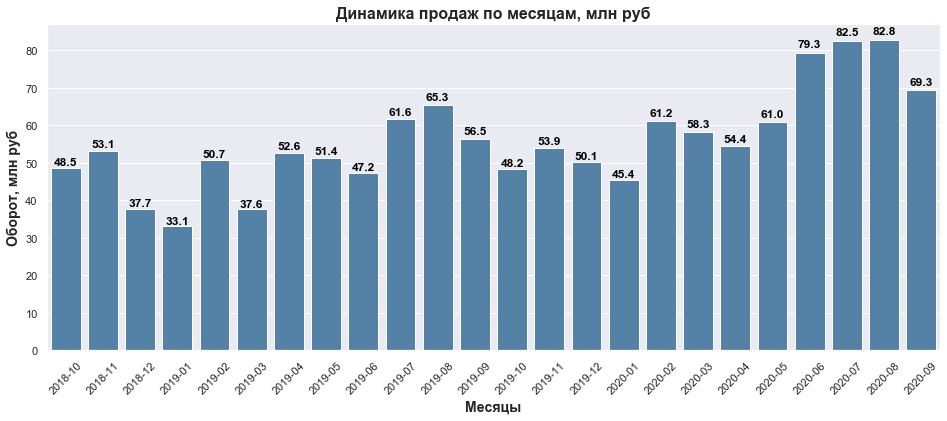

In [489]:
# –û–±—â–∞—è –¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ–¥–∞–∂ –∑–∞ 2 –≥–æ–¥–∞ –ø–æ –º–µ—Å—è—Ü–∞–º
sns.set()

fig, ax1 = plt.subplots()
fig.set_size_inches(16, 6)

# g = sns.scatterplot(x='YrMn', y='Sm_Sale', data=df_sales, color = 'steelblue')
g = sns.barplot(x = 'yr_mn', y = 'sm_sale', data = df_sales, color = 'steelblue', ax = ax1 )

# ax2 = ax1.twinx()
# sns.scatterplot(x = 'yr_mn', y = 'proc_margin', data = df_sales, color = 'dark_red', ax = ax2)

plt.xticks(rotation = 45)

plt.title('–î–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ–¥–∞–∂ –ø–æ –º–µ—Å—è—Ü–∞–º, –º–ª–Ω —Ä—É–±', fontsize = 16, weight = 'bold')
plt.xlabel('–ú–µ—Å—è—Ü—ã',          fontsize = 14, weight = 'bold')
plt.ylabel('–û–±–æ—Ä–æ—Ç, –º–ª–Ω —Ä—É–±', fontsize = 14, weight = 'bold')

for index, row in df_sales.iterrows():
    g.text(row.name, row.sm_sale + row.sm_sale * .02, round(row.sm_sale, 1), 
           color='black', ha="center", weight = 'bold', size = 12)

### –û–±—â–∏–µ –∏—Ç–æ–≥–∏ –∑–∞ 2 –≥–æ–¥–∞: 
* –ú–µ—Å—è—Ü—ã (–∫–æ–ª-–≤–æ –ø–µ—Ä–∏–æ–¥–æ–≤, –Ω–∞—á–∞–ª–æ, –∫–æ–Ω–µ—Ü)
* –ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¢–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø, 
* –ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¢–æ–≤–∞—Ä–æ–≤
* –ì–æ–¥–æ–≤–æ–π –û–±–æ—Ä–æ—Ç (–∑–∞ —Å–∫–æ–ª—å–∑—è—â–∏–π –≥–æ–¥)
* –°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω—ã–π –û–±–æ—Ä–æ—Ç

In [490]:
df_total = df_data.groupby(['yr_number']).agg({
                                                 'yr_mn':            ['nunique', 'min', 'max'],
                                                 'product_group':    ['nunique'], 
                                                 'model':            ['nunique'],
                                                 'sm_sale':          ['sum']
                                                })
df_total['sm_sale_per_month_avg', 'avg'] = 0
df_total = df_total.droplevel(1, axis=1)
df_total.columns = ['count_months', 'min_month', 'max_month', 
                    'count_product_groups', 'count_products', 
                    'sm_sale', 'sm_sale_per_month_avg']

df_total['sm_sale_per_month_avg'] = round(df_total['sm_sale'] / df_total['count_months'], 2)
df_total

count_months min_month max_month  count_product_groups  \
yr_number                                                           
1                    12   2018-10   2019-09                    54   
2                    12   2019-10   2020-09                    56   

           count_products     sm_sale  sm_sale_per_month_avg  
yr_number                                                     
1                     245  595.364384                  49.61  
2                     273  746.424948                  62.20

### –¢–æ–≤–∞—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã - –û–±—â–∏–π –æ–±–æ—Ä–æ—Ç –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –≥—Ä—É–ø–ø–∞–º –∏ —Ç.–¥.

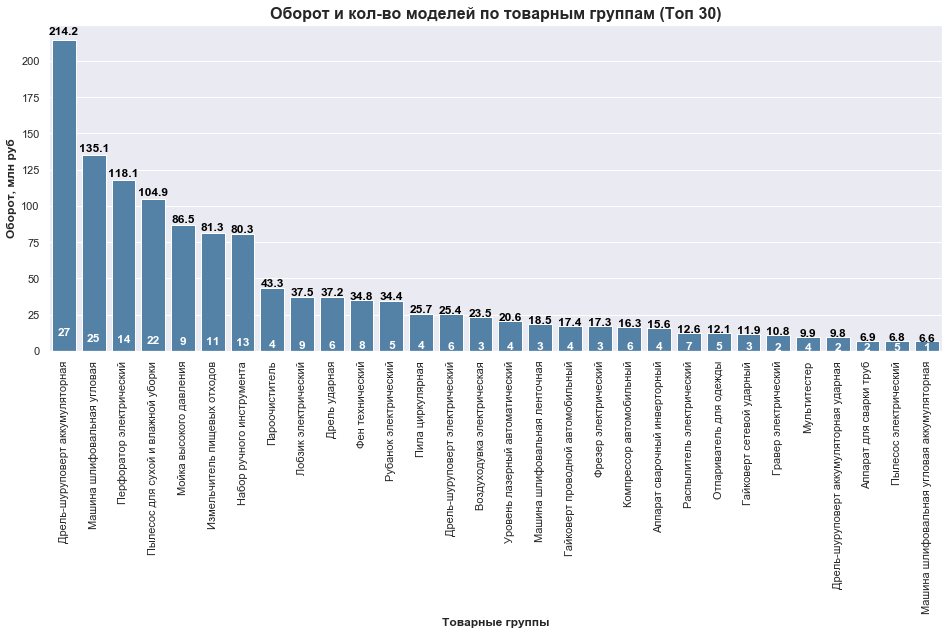

In [491]:
df_groups = pd.DataFrame(df_data.groupby(['product_group'], as_index = False).agg({
                                                                    'model':   'nunique',
                                                                    'sm_sale': 'sum'
                                                                }).sort_values(by = 'sm_sale', ascending = False))
df_groups.reset_index(inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

df_top_values = df_groups.head(30)
g = sns.barplot(x = 'product_group', y = 'sm_sale', data = df_top_values, color = 'steelblue')

plt.xticks(rotation = 90)

plt.title('–û–±–æ—Ä–æ—Ç –∏ –∫–æ–ª-–≤–æ –º–æ–¥–µ–ª–µ–π –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º (–¢–æ–ø 30)', fontsize = 16, weight = 'bold')
plt.xlabel('–¢–æ–≤–∞—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã',  fontsize = 12, weight = 'bold')
plt.ylabel('–û–±–æ—Ä–æ—Ç, –º–ª–Ω —Ä—É–±',  fontsize = 12, weight = 'bold')

for index, row in df_top_values.iterrows():
    g.text(row.name, row.sm_sale + row.sm_sale * .02, round(row.sm_sale, 1), 
           color = 'black', ha = "center", weight = 'bold', size = 12)
    
for index, row in df_top_values.iterrows():
    g.text(row.name, row.sm_sale * 0.05, round(row.model, 1), 
           color = 'white', ha = "center", weight = 'bold', size = 12)
plt.show()

### –¢–æ–≤–∞—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã - –ò—Ç–æ–≥–∏ –ø—Ä–æ–¥–∞–∂ –∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞

In [492]:
df_groups_sales = df_data.groupby(['product_group', 'yr_number', 'yr', 'mn', 'yr_mn', 'period_id'], 
                                    as_index = False).agg({
                                                            'model':   'nunique',
                                                            'sm_sale': 'sum'
                                                        })
# df_groups_sales.reset_index(inplace = True)
# df_groups_sales = df_groups_sales.droplevel(1, axis=1)

df_groups_stat = df_groups_sales.groupby(['product_group'], as_index = False).agg(
                                                        { 
                                                            'yr_mn':   ['nunique'],
                                                            'model':   ['max'],
                                                            'sm_sale': ['sum', 'min', 'max', 'mean', 'median', 'std', 'var']
                                                        })
# df_groups_stat.reset_index(inplace = True)
# df_groups_stat = df_groups_stat.droplevel(0, axis=1)

df_groups_stat.columns = ['product_group', 'count_months', 'count_products', 
                              'sum', 'min', 'max', 'mean', 'median', 'std', 'var']
df_groups_stat = df_groups_stat.sort_values(by = 'sum', ascending = False)
df_groups_stat.head(30)

product_group  count_months  count_products  \
12             –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è            24              27   
24                 –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è            24              25   
36                    –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24              14   
45          –ü—ã–ª–µ—Å–æ—Å –¥–ª—è —Å—É—Ö–æ–π –∏ –≤–ª–∞–∂–Ω–æ–π —É–±–æ—Ä–∫–∏            24              22   
26                     –ú–æ–π–∫–∞ –≤—ã—Å–æ–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è            24               9   
15                –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤            24              11   
31                   –ù–∞–±–æ—Ä —Ä—É—á–Ω–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞            24              13   
34                              –ü–∞—Ä–æ–æ—á–∏—Å—Ç–∏—Ç–µ–ª—å            24               4   
18                        –õ–æ–±–∑–∏–∫ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               9   
9                                –î—Ä–µ–ª—å —É–¥–∞—Ä–Ω–∞—è            24               6   
52                             –§–µ–Ω —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π            24               8   
49                       –†—É–±–∞–Ω–æ–∫ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               5   
40                            –ü–∏–ª–∞ —Ü–∏—Ä–∫—É–ª—è—Ä–Ω–∞—è            24               4   
14              –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               6   
3                   –í–æ–∑–¥—É—Ö–æ–¥—É–≤–∫–∞ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∞—è            24               3   
51             –£—Ä–æ–≤–µ–Ω—å –ª–∞–∑–µ—Ä–Ω—ã–π –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π            24               4   
22               –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è –ª–µ–Ω—Ç–æ—á–Ω–∞—è            24               3   
4            –ì–∞–π–∫–æ–≤–µ—Ä—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π            24               4   
53                        –§—Ä–µ–∑–µ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               3   
16                    –ö–æ–º–ø—Ä–µ—Å—Å–æ—Ä –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π            24               6   
1                –ê–ø–ø–∞—Ä–∞—Ç —Å–≤–∞—Ä–æ—á–Ω—ã–π –∏–Ω–≤–µ—Ä—Ç–æ—Ä–Ω—ã–π            24               4   
48                   –†–∞—Å–ø—ã–ª–∏—Ç–µ–ª—å —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               7   
32                     –û—Ç–ø–∞—Ä–∏–≤–∞—Ç–µ–ª—å –¥–ª—è –æ–¥–µ–∂–¥—ã            13               5   
5                    –ì–∞–π–∫–æ–≤–µ—Ä—Ç —Å–µ—Ç–µ–≤–æ–π —É–¥–∞—Ä–Ω—ã–π            20               3   
8                         –ì—Ä–∞–≤–µ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               2   
27                                –ú—É–ª—å—Ç–∏—Ç–µ—Å—Ç–µ—Ä            24               4   
13     –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è —É–¥–∞—Ä–Ω–∞—è            24               2   
0                      –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±            24               2   
47                       –ü—ã–ª–µ—Å–æ—Å —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π            24               5   
25  –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è            13               1   

           sum       min        max      mean    median       std       var  
12  214.170946  5.048566  13.805815  8.923789  8.523993  2.440733  5.957177  
24  135.085568  2.660657  10.246789  5.628565  5.638184  2.209086  4.880061  
36  118.061876  2.515169   8.588806  4.919245  4.386523  1.592855  2.537186  
45  104.875255  3.249647   5.619397  4.369802  4.266474  0.689901  0.475964  
26   86.513958  0.628954  11.113526  3.604748  2.537720  2.961896  8.772829  
15   81.279589  0.362294   7.643491  3.386650  3.636240  2.121264  4.499762  
31   80.338676  0.641461   8.256657  3.347445  3.372268  1.665218  2.772950  
34   43.333706  0.000000   7.814066  1.805571  1.353554  1.807297  3.266322  
18   37.482531  0.704506   2.902431  1.561772  1.546593  0.470675  0.221535  
9    37.223536  0.954430   2.414681  1.550981  1.501368  0.390153  0.152220  
5

## ABC –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º (–ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é –û–±–æ—Ä–æ—Ç)

In [493]:
df_groups_stat['sm_total']        = df_groups_stat['sum'].sum()
df_groups_stat['share_sale']      = df_groups_stat['sum'] / df_groups_stat['sm_total']
df_groups_stat['share_sale_cumm'] = 0
df_groups_stat['rank_abc'] = ''

count = df_groups_stat.shape[0]
i = 0
for index, row in df_groups_stat.iterrows():
    i += 1
    value = df_groups_stat.iloc[0:i]['share_sale'].sum()

    df_groups_stat.loc[index, 'share_sale_cumm'] = value
   
    if value <= 0.5:
        df_groups_stat.loc[index, 'rank_abc'] = 'A'
    elif value < 0.9:
        df_groups_stat.loc[index, 'rank_abc'] = 'B'
    else:
        df_groups_stat.loc[index, 'rank_abc'] = 'C'

# –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è ABC –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º
df_groups_stat[['product_group', 'sum', 'share_sale', 'share_sale_cumm', 'rank_abc']]

product_group         sum  share_sale  \
12             –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è  214.170946    0.159616   
24                 –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è  135.085568    0.100676   
36                    –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  118.061876    0.087988   
45          –ü—ã–ª–µ—Å–æ—Å –¥–ª—è —Å—É—Ö–æ–π –∏ –≤–ª–∞–∂–Ω–æ–π —É–±–æ—Ä–∫–∏  104.875255    0.078161   
26                     –ú–æ–π–∫–∞ –≤—ã—Å–æ–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è   86.513958    0.064477   
15                –ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤   81.279589    0.060576   
31                   –ù–∞–±–æ—Ä —Ä—É—á–Ω–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞   80.338676    0.059874   
34                              –ü–∞—Ä–æ–æ—á–∏—Å—Ç–∏—Ç–µ–ª—å   43.333706    0.032295   
18                        –õ–æ–±–∑–∏–∫ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   37.482531    0.027935   
9                                –î—Ä–µ–ª—å —É–¥–∞—Ä–Ω–∞—è   37.223536    0.027742   
52                             –§–µ–Ω —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π   34.780845    0.025921   
49                       –†—É–±–∞–Ω–æ–∫ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   34.390592    0.025630   
40                            –ü–∏–ª–∞ —Ü–∏—Ä–∫—É–ª—è—Ä–Ω–∞—è   25.689710    0.019146   
14              –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   25.394176    0.018926   
3                   –í–æ–∑–¥—É—Ö–æ–¥—É–≤–∫–∞ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∞—è   23.511782    0.017523   
51             –£—Ä–æ–≤–µ–Ω—å –ª–∞–∑–µ—Ä–Ω—ã–π –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π   20.629942    0.015375   
22               –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è –ª–µ–Ω—Ç–æ—á–Ω–∞—è   18.487245    0.013778   
4            –ì–∞–π–∫–æ–≤–µ—Ä—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π   17.435882    0.012995   
53                        –§—Ä–µ–∑–µ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   17.327574    0.012914   
16                    –ö–æ–º–ø—Ä–µ—Å—Å–æ—Ä –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π   16.275670    0.012130   
1                –ê–ø–ø–∞—Ä–∞—Ç —Å–≤–∞—Ä–æ—á–Ω—ã–π –∏–Ω–≤–µ—Ä—Ç–æ—Ä–Ω—ã–π   15.606208    0.011631   
48                   –†–∞—Å–ø—ã–ª–∏—Ç–µ–ª—å —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   12.614212    0.009401   
32                     –û—Ç–ø–∞—Ä–∏–≤–∞—Ç–µ–ª—å –¥–ª—è –æ–¥–µ–∂–¥—ã   12.081036    0.009004   
5                    –ì–∞–π–∫–æ–≤–µ—Ä—Ç —Å–µ—Ç–µ–≤–æ–π —É–¥–∞—Ä–Ω—ã–π   11.876316    0.008851   
8                         –ì—Ä–∞–≤–µ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π   10.795568    0.008046   
27                                –ú—É–ª—å—Ç–∏—Ç–µ—Å—Ç–µ—Ä    9.945165    0.007412   
13     –î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è —É–¥–∞—Ä–Ω–∞—è    9.782877    0.007291   
0                      –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±    6.857870    0.005111   
47                       –ü—ã–ª–µ—Å–æ—Å —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π    6.829385    0.005090   
25  –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è    6.633117    0.004943   
28                                   –ú—É–ª—å—Ç–∏—Ç—É–ª    6.055224    0.004513   
37               –ü–∏–ª–∞ —Å–∞–±–µ–ª—å–Ω–∞—è –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è    5.890641    0.004390   
11                                –î—Ä–µ–ª—å-–ú–∏–∫—Å–µ—Ä    5.703378    0.004251   
21            –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è –≤–∏–±—Ä–∞—Ü–∏–æ–Ω–Ω–∞—è    5.375245    0.004006   
39                      –ü–∏–ª–∞ —Ü–µ–ø–Ω–∞—è –±–µ–Ω–∑–∏–Ω–æ–≤–∞—è    4.782178    0.003564   
23             –ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è –æ—Ä–±–∏—Ç–∞–ª—å–Ω–∞—è    3.618078    0.002696   
7                        –ì—Ä–∞–≤–µ—Ä –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω—ã–π    3.523816    0.002626   
19                             –ú–∞—à–∏–Ω–∞ –∑–∞—Ç–æ—á–Ω–∞—è    3.435732    0.002561   
55                        –ß–∞–π–Ω–∏–∫ —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π    3.256482    0.002427   
2                  –í–æ–∑–¥—É—Ö–æ–¥—É–≤–∫–∞ –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è    3.152387    0.002349   
38                –ü–∏–ª–∞ —Å–∞–±–µ–ª—å–Ω–∞—è —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∞—è    2.744486    0.002045   
5

### –ò—Ç–æ–≥–∏ –ø–æ —Ä–∞–Ω–≥–∞–º ABC

In [494]:
df_abc_sale = df_groups_stat.groupby('rank_abc').agg({'sum': ['sum'], 'product_group': ['count'], 'share_sale': 'sum'})
df_abc_sale.reset_index(inplace = True)
df_abc_sale = df_abc_sale.droplevel(1, axis=1)
df_abc_sale.columns = ['rank_abc', 'sm_sale', 'count_groups', 'share_sale']
df_abc_sale['share_groups'] = round(df_abc_sale['count_groups'] / df_abc_sale['count_groups'].sum(), 6)
df_abc_sale = df_abc_sale[['rank_abc', 'count_groups', 'share_groups', 'sm_sale', 'share_sale']]
df_abc_sale

rank_abc  count_groups  share_groups     sm_sale  share_sale
0        A             5      0.089286  658.707603    0.490917
1        B            17      0.303571  541.801876    0.403791
2        C            34      0.607143  141.279853    0.105292

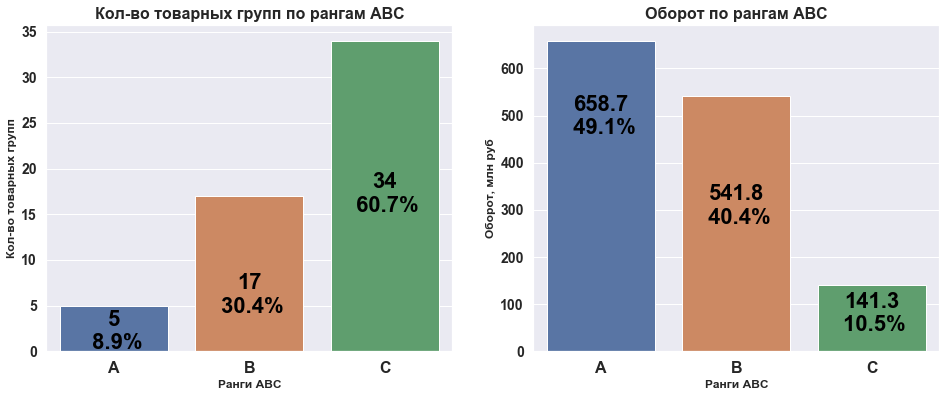

In [495]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

plt.subplot(121)
g1 = sns.barplot(x = 'rank_abc', y = 'count_groups', data = df_abc_sale)

plt.xlabel('–†–∞–Ω–≥–∏ ABC', fontsize = 12, weight = 'bold')
plt.ylabel('–ö–æ–ª-–≤–æ —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø', fontsize = 12, weight = 'bold')
plt.title(f'–ö–æ–ª-–≤–æ —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø –ø–æ —Ä–∞–Ω–≥–∞–º ABC', fontsize = 16, weight = 'bold')

plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 14, weight = 'bold')

plt.subplot(122)
g2 = sns.barplot(x = 'rank_abc', y = 'sm_sale', data = df_abc_sale)

plt.xlabel('–†–∞–Ω–≥–∏ ABC', fontsize = 12, weight = 'bold')
plt.ylabel('–û–±–æ—Ä–æ—Ç, –º–ª–Ω —Ä—É–±', fontsize = 12, weight = 'bold')
plt.title(f'–û–±–æ—Ä–æ—Ç –ø–æ —Ä–∞–Ω–≥–∞–º ABC', fontsize = 16, weight = 'bold')

plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 14, weight = 'bold')

for index, row in df_abc_sale.iterrows():
    g1.text(row.name, row.count_groups * (0.05 + index * 0.2), str(round(row.count_groups, 0)) + \
                        '\n ' + str(round(row.share_groups * 100, 1)) + '%', 
               color = 'black', ha = "center", weight = 'bold', size = 22)

for index, row in df_abc_sale.iterrows():
    g2.text(row.name, row.sm_sale * (0.7 - index * 0.2), str(round(row.sm_sale, 1)) + \
                        '\n ' + str(round(row.share_sale * 100, 1)) + '%',
               color = 'black', ha = "center", weight = 'bold', size = 22)    
plt.show()

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö (–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö)

### –û–±—â–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Ç–æ–≤–∞—Ä–∞–º (sum, min, max, mean, median, std, var)

In [496]:
#--------------------------------------------------------------------------------------------------------
# –û–±—â–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Ç–æ–≤–∞—Ä–∞–º  (sum, min, max, mean, median, std, var)
df_products_stat = df_data.groupby(['model']).agg({
                                                    'yr_mn':   ['nunique'],
                                                    'sm_sale': ['sum', 'min', 'max', 'mean', 'median', 'var', 'std']
                                                    }).reset_index()
df_products_stat.columns = ['model', 'count_months', 'sum', 'min', 'max', 'mean', 'median', 'var', 'std']

df_products_stat = df_products_stat.sort_values(by = 'sum', ascending = False)
df_products_stat.head(10)

#--------------------------------------------------------------------------------------------------------
# –û–±—ä–µ–¥–∏–Ω—è—é –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –æ–±—â–µ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π
df_data['sm_sale_correct'] = df_data['sm_sale']
df_data['sm_sale_clean']   = 0

if not 'median' in df_data.columns:
    df_data = df_data.merge(df_products_stat, on = ['model'], how = 'left')

#--------------------------------------------------------------------------------------------------------
# –û—Ç–º–µ—á–∞—é –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ –æ–±–ª–∞—Å—Ç–∏ (–°—Ä–µ–¥–Ω–µ–µ +/- 2*–°–ö–û)
df_data['count_in_std_2'] = 0
df_data.loc[ (df_data['sm_sale'] >= df_data['mean'] - 2 * df_data['std']) &
             (df_data['sm_sale'] <= df_data['mean'] + 2 * df_data['std']), 'count_in_std_2'] = 1

#--------------------------------------------------------------------------------------------------------
# –í –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø–µ—Ä–∏–æ–¥—ã, –∫–æ–≥–¥–∞ —Ç–æ–≤–∞—Ä–∞ –Ω–µ –±—ã–ª–æ –Ω–∞ –æ—Å—Ç–∞—Ç–∫–µ
# –î–ª—è –æ—Ü–µ–Ω–∫–∏ –Ω–∞–ª–∏—á–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–∞–∂–¥–æ–º –º–µ—Å—è—Ü–µ –≤–≤–µ–¥–µ–Ω –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å proc_instock (–ø—Ä–æ—Ü–µ–Ω—Ç –Ω–∞–ª–∏—á–∏—è –Ω–∞ –æ—Å—Ç–∞—Ç–∫–µ):
#      proc_instock = (cnt_days - ndays_outofstock) / cnt_days;
#      —Ç.–µ. –∫–æ–ª-–≤–æ –¥–Ω–µ–π, –∫–æ–≥–¥–∞ —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–∞ –æ—Å—Ç–∞—Ç–∫–µ / –∫–æ–ª-–≤–æ –¥–Ω–µ–π –≤ –º–µ—Å—è—Ü–µ
# (–Ω–µ —Å—Ç–∞–ª –≤–∫–ª—é—á–∞—Ç—å —ç—Ç–∏ —Ä–∞—Å—á–µ—Ç—ã –≤ –∫–æ–¥)

#--------------------------------------------------------------------------------------------------------
# –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É—é —Å—É–º–º—É –ø—Ä–æ–¥–∞–∂ –¥–ª—è –º–µ—Å—è—Ü–µ–≤, –≥–¥–µ proc_instock < 1 
# —ç—Ç–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≥—Ä—É–±–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ, –Ω–æ –ª—É—á—à–µ —á–µ–º –Ω–∏—á–µ–≥–æ

# 1) –¥–ª—è –º–µ—Å—è—Ü–µ–≤, –∫–æ–≥–¥–∞ —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–∞ –æ—Å—Ç–∞—Ç–∫–µ –±–æ–ª–µ–µ 50% –≤—Ä–µ–º–µ–Ω–∏,
#    —É–≤–µ–ª–∏—á–∏–≤–∞—é —Å—É–º–º—É —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –ø—Ä–æ–¥–∞–∂ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –≤—Ä–µ–º–µ–Ω–∏ –¥–µ—Ñ–∏—Ü–∏—Ç–∞
df_data.loc[ df_data['proc_instock'] >= 0.5, 'sm_sale_correct'] = round(df_data['sm_sale'] / df_data['proc_instock'], 6)

# 2) –¥–ª—è –º–µ—Å—è—Ü–µ–≤, –∫–æ–≥–¥–∞ —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–∞ –æ—Å—Ç–∞—Ç–∫–µ –º–µ–Ω–µ–µ 50% –≤—Ä–µ–º–µ–Ω–∏, 
#    –∑–∞–º–µ–Ω—è—é —Å—É–º–º—É –ø—Ä–æ–¥–∞–∂ –Ω–∞ –º–µ–¥–∏–∞–Ω—É –ø–æ —ç—Ç–æ–º—É —Ç–æ–≤–∞—Ä—É, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—É—é –ø–æ –º–µ—Å—è—Ü–∞–º –∑–∞ –≤–µ—Å—å –ø–µ—Ä–∏–æ–¥
df_data.loc[ df_data['proc_instock'] < 0.5, 'sm_sale_correct'] = round(df_data['median'], 6)

#--------------------------------------------------------------------------------------------------------
# –í—ã–±—Ä–æ—Å—ã
#--------------------------------------------------------------------------------------------------------
# –û–±—Ä–∞–±–∞—Ç—ã–≤–∞—é –≤—ã–±—Ä–æ—Å—ã, –∑–∞–º–µ–Ω—è—é –Ω–∞ –º–µ–¥–∏–∞–Ω—É –∑–Ω–∞—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –±–æ–ª—å—à–µ, —á–µ–º –Ω–∞ 3*–°–ö–û 
#    –∑–∞–º–µ–Ω—è—é —Å—É–º–º—É –ø—Ä–æ–¥–∞–∂ –Ω–∞ –º–µ–¥–∏–∞–Ω—É –ø–æ —ç—Ç–æ–º—É —Ç–æ–≤–∞—Ä—É, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—É—é –ø–æ –º–µ—Å—è—Ü–∞–º, –∑–∞ –≤–µ—Å—å –ø–µ—Ä–∏–æ–¥
df_data.loc[ df_data['sm_sale'] > df_data['mean'] + 3 * df_data['std'], 'sm_sale_correct'] = round(df_data['median'], 6)
df_data.loc[ df_data['sm_sale'] < df_data['mean'] - 3 * df_data['std'], 'sm_sale_correct'] = round(df_data['median'], 6)

### –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂, –æ—á–∏—â–µ–Ω–Ω–∞—è –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

In [497]:
# –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂, –æ—á–∏—â–µ–Ω–Ω–∞—è –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
# –ó–¥–µ—Å—å —è –∏—Å–ø–æ–ª—å–∑—É—é –Ω–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–ª—É—á–µ–Ω–∞ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–¥–∞–∂ –∫–æ–º–ø–∞–Ω–∏–∏,
# –∞ –ø–æ–¥–≥—Ä—É–∂–∞—é –¥–∞–Ω–Ω—ã–µ –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Å –Ø–Ω–¥–µ–∫—Å Wordstat)

# –≠—Ç–∏ –¥–∞–Ω–Ω—ã–µ –±–æ–ª–µ–µ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω—ã –∏ –≤ –Ω–∏—Ö –Ω–µ—Ç –∏—Å–∫–∞–∂–µ–Ω–∏—è –∏–∑-–∑–∞:
#    - –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è —Ç–æ–≤–∞—Ä–∞ –Ω–∞ —Å–∫–ª–∞–¥–∞—Ö
#    - –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —Å–∞–º–æ–π –∫–æ–º–ø–∞–Ω–∏–∏
#    - –≤–≤–æ–¥–∞/–≤—ã–≤–æ–¥–∞ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç–∞ –∏–∑ –º–∞—Ç—Ä–∏—Ü –∫—Ä—É–ø–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤

if not 'season_index' in df_data.columns:
    df_data = df_data.merge(df_season, on = ['product_group', 'mn'], how = 'left')

    # –î–ª—è —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –Ω–µ –Ω–∞–π–¥–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ –ø–æ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Å –Ø–Ω–¥–µ–∫—Å–∞, –ø—Ä–∏–º–µ–Ω—è—é –æ–±—â—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å "Common"
    df_1 = df_season.loc[df_season['product_group'] == 'Common', ['mn', 'season_index']].\
            rename(columns = {'season_index': 'season_index_common'})

    df_data = df_data.merge(df_1, on = ['mn'], how = 'left')

    df_data.loc[df_data['season_index'].isnull(), 'season_index'] = df_data['season_index_common']

#--------------------------------------------------------------------------------------------------------------
# –°–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂, –æ—á–∏—â–µ–Ω–Ω–∞—è –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏

df_data['sm_sale_clean'] = round(df_data['sm_sale_correct'] / df_data['season_index'], 6)

#### –ü—Ä–∏–º–µ—Ä —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –æ—á–∏—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–¥–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ "–ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π BHD-700-P"

In [498]:
mdl = 'BHD-700-P'
df_example = df_data.loc[ (df_data['model'] == mdl)]

df_example = df_example[['product_group', 'model', 'yr_mn', 'cnt_days', 'ndays_outofstock', 'proc_instock', 
                         'sm_sale', 'sm_sale_correct', 'season_index', 'sm_sale_clean']]
# –ü—Ä–∏–∑–Ω–∞–∫, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂ –±—ã–ª–æ —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–æ
df_example['was_adjustment'] = df_example['sm_sale_correct'] - df_example['sm_sale']
df_example.head(10)

product_group      model    yr_mn  cnt_days  \
1701  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2018-10        31   
1702  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2018-11        30   
1703  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2018-12        31   
1704  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-01        31   
1705  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-02        28   
1706  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-03        31   
1707  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-04        30   
1708  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-05        31   
1709  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-06        30   
1710  –ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π  BHD-700-P  2019-07        31   

      ndays_outofstock  proc_instock   sm_sale  sm_sale_correct  season_index  \
1701                 0      1.000000  1.390013         1.390013        1.0039   
1702                 0      1.000000  0.697417         0.697417        0.9678   
1703                 0      1.000000  0.610364         0.610364        0.9126   
1704                 5      0.838710  0.045820         0.054632        0.8689   
1705                28      0.000000  0.109750         0.713120        1.0049   
1706                31      0.000000 -0.012237         0.713120        0.9254   
1707                 2      0.933333  0.592092         0.634384        0.8147   
1708                 0      1.000000  0.970994         0.970994        0.8666   
1709                 0      1.000000  0.925209         0.925209        1.0314   
1710                 0      1.000000  1.638536         1.638536        1.1445   

      sm_sale_clean  was_adjustment  
1701       1.384613        0.000000  
1702       0.720621        0.000000  
1703       0.668819        0.000000  
1704       0.062875        0.008812  
1705       0.709643        0.603370  
1706       0.770607        0.725357  
1707       0.778672        0.042292  
1708       1.120464        0.000000  
1709       0.897042        0.000000  
1710       1.431661        0.000000

## –û—Ü–µ–Ω–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π

### –ü—Ä–æ—Ü–µ–Ω—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ (–°—Ä–µ–¥–Ω–µ–µ +/- 2*–°–ö–û)

In [499]:
df_std_2 = df_data.groupby(['model']).agg({ 'period_id':   'count',
                                            'count_in_std_2': 'sum'
                                            }).reset_index()
df_std_2.columns = ['model', 'cnt_total', 'cnt_in_std_2']

df_std_2['proc_in_std_2'] = round(df_std_2['cnt_in_std_2'] / df_std_2['cnt_total'], 4)

#--------------------------------------------------------------------------------------------------------
cnt_value_total    = df_std_2.shape[0]
cnt_value_in_std_2 = df_std_2.loc[df_std_2['proc_in_std_2'] > 0.90, 'model'].nunique()
proc_value = round(cnt_value_in_std_2 / cnt_value_total * 100, 1)

#--------------------------------------------------------------------------------------------------------
if not 'proc_in_std_2' in df_products_stat.columns:
    df_products_stat = df_products_stat.merge(df_std_2[['model', 'cnt_in_std_2', 'proc_in_std_2']], 
                                            on = ['model'], how = 'left')
    
#--------------------------------------------------------------------------------------------------------
print()
print(f'\033[1m\033[4m–£ {cnt_value_in_std_2} –∏–∑ {cnt_value_total} —Ç–æ–≤–∞—Ä–æ–≤ (–∏–ª–∏ {proc_value}%) –ø—Ä–æ—Ü–µ–Ω—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, \
–Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ (–°—Ä–µ–¥–Ω–µ–µ +/- 2*–°–ö–û), —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ 90%')
print('\033[1m\033[4m–¢–æ–ø 10 —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ –æ–±–æ—Ä–æ—Ç—É —Å–æ —Å–≤–æ–µ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π:')
df_products_stat.head(10)


–£ 267 –∏–∑ 273 —Ç–æ–≤–∞—Ä–æ–≤ (–∏–ª–∏ 97.8%) –ø—Ä–æ—Ü–µ–Ω—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ (–°—Ä–µ–¥–Ω–µ–µ +/- 2*–°–ö–û), —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ 90%
–¢–æ–ø 10 —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ –æ–±–æ—Ä–æ—Ç—É —Å–æ —Å–≤–æ–µ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π:


model  count_months        sum       min       max      mean  \
0  BAB-18UX2LI-FDK            24  38.700656  0.481166  3.602375  1.612527   
1        BWS-905-R            24  30.839905  0.599223  2.146280  1.284996   
2         BHD-800N            24  27.798671  0.003040  2.736036  1.158278   
3          BTK-123            24  27.691639  0.039991  2.700538  1.153818   
4         BAB-12-P            24  24.931133  0.037322  2.065592  1.038797   
5        BHD-700-P            24  23.587124 -0.012237  2.590310  0.982797   
6     BSS-1220-PRO            24  22.126066 -0.017391  2.040577  0.921919   
7  BAB-14UX2LI-FDK            24  21.397375  0.230686  1.883644  0.891557   
8  TITAN MAX POWER            24  18.280613  0.055522  1.737338  0.761692   
9       BAB-10,8-P            24  18.158708  0.274583  1.695922  0.756613   

     median       var       std  cnt_in_std_2  proc_in_std_2  
0  1.390150  0.502716  0.709025            23         0.9583  
1  1.294077  0.256004  0.505969            24         1.0000  
2  0.954499  0.430877  0.656412            22         0.9167  
3  1.062848  0.336172  0.579803            22         0.9167  
4  1.099597  0.353197  0.594304            24         1.0000  
5  0.713121  0.608628  0.780146            23         0.9583  
6  0.977710  0.212712  0.461207            22         0.9167  
7  0.844761  0.139489  0.373482            23         0.9583  
8  0.715250  0.207772  0.455820            23         0.9583  
9  0.659032  0.124541  0.352903            23         0.9583

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–æ–¥–∞–∂ (—Ç–µ—Å—Ç—ã –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –∏ –ü–∏—Ä—Å–æ–Ω–∞)

In [500]:
# –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞
def test_shapiro(y):
    data = y
    # normality test
    stat, p = shapiro(data)
    print('\033[1m\033[4mStatistics = %.3f, p-value = %.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('–ü—Ä–∏–Ω—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏')
    else:
        print('–û—Ç–∫–ª–æ–Ω–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏')
    print()

In [501]:
# –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è –ü–∏—Ä—Å–æ–Ω–∞
def test_pirsona(y):
    # normality test
    stat, p = normaltest(y) 
    print('\033[1m\033[4mStatistics = %.3f, p-value = %.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('–ü—Ä–∏–Ω—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏')
    else:
        print('–û—Ç–∫–ª–æ–Ω–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏')
    print()

In [502]:
y = df_sales['sm_sale'].values
test_shapiro(y)
test_pirsona(y)

Statistics = 0.943, p-value = 0.193
–ü—Ä–∏–Ω—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏

Statistics = 1.873, p-value = 0.392
–ü—Ä–∏–Ω—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏



## –ì—Ä–∞—Ñ–∏–∫ —Ä–∞–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—â–∏—Ö –ø—Ä–æ–¥–∞–∂ (—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö, —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö, –æ—á–∏—â–µ–Ω–Ω—ã—Ö)

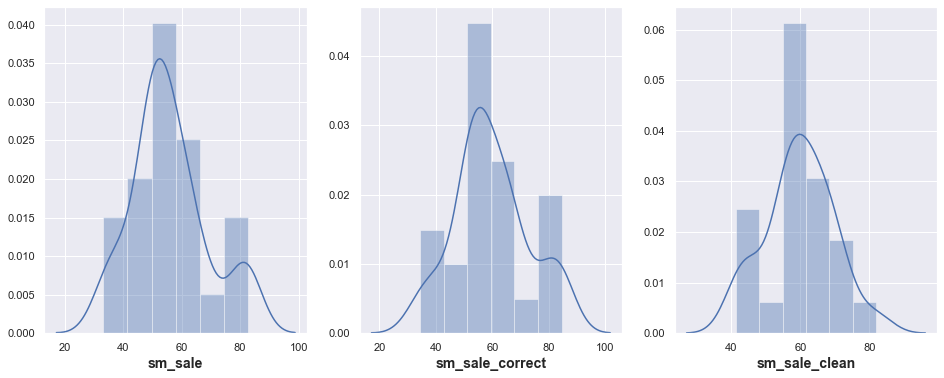

In [503]:
df_disp = df_data.groupby(['yr_number', 'period_id'], as_index = False).agg({
                                                                                'sm_sale':         'sum',
                                                                                'sm_sale_correct': 'sum',
                                                                                'sm_sale_clean':   'sum'
                                                                            })
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

plt.subplot(131)
g1 = sns.distplot(df_disp[['sm_sale']])
plt.xlabel('sm_sale', fontsize = 14, weight = 'bold')

plt.subplot(132)
g2 = sns.distplot(df_disp[['sm_sale_correct']])
plt.xlabel('sm_sale_correct', fontsize = 14, weight = 'bold')

plt.subplot(133)
g3 = sns.distplot(df_disp[['sm_sale_clean']])
plt.xlabel('sm_sale_clean', fontsize = 14, weight = 'bold')

plt.show()

### –ï—â–µ –æ–¥–∏–Ω –≤–∏–¥ –≥—Ä–∞—Ñ–∏–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏—è –æ–±—â–∏—Ö –ø—Ä–æ–¥–∞–∂

### –ü—Ä–æ–¥–∞–∂–∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ, sm_sale

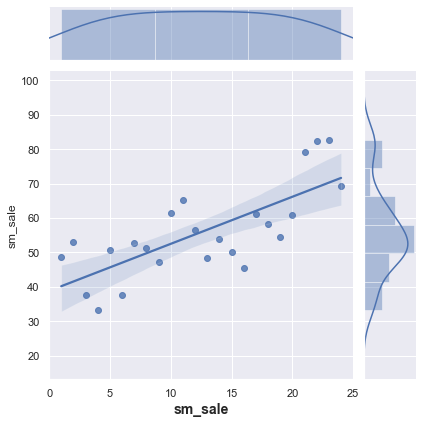

In [504]:
sns.jointplot(x='period_id', y='sm_sale', data=df_disp, kind='reg');
plt.xlabel('sm_sale', fontsize = 14, weight = 'bold')
plt.xlim(0, 25)
plt.show()

### –ü—Ä–æ–¥–∞–∂–∏ –æ—á–∏—â–µ–Ω–Ω—ã–µ, sm_sale_clean

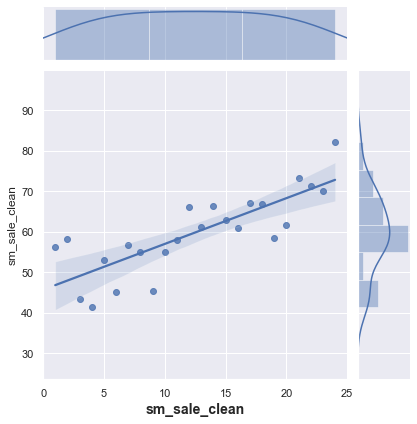

In [505]:
g1 = sns.jointplot(x='period_id', y='sm_sale_clean', data=df_disp, kind='reg');
plt.xlabel('sm_sale_clean', fontsize = 14, weight = 'bold')
plt.xlim(0, 25)
plt.show()

## –ù–µ—Å–∫–æ–ª—å–∫–æ –≥—Ä–∞—Ñ–∏–∫–æ–≤ - –†–∞—Å–ø—Ä–µ–¥–µ–Ω–∏—è –ø—Ä–æ–¥–∞–∂ –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º

### –ù–∞ –ø—Ä–∏–º–µ—Ä–µ –¢–æ–ø 10 —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø –ø–æ –æ–±–æ—Ä–æ—Ç—É

In [506]:
df10 = df_groups_sales.loc[ df_groups_sales['product_group'].\
                           isin([
                                    '–î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è',
                                    '–ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è',
                                    '–ü–µ—Ä—Ñ–æ—Ä–∞—Ç–æ—Ä —ç–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–π',
                                    '–ü—ã–ª–µ—Å–æ—Å –¥–ª—è —Å—É—Ö–æ–π –∏ –≤–ª–∞–∂–Ω–æ–π —É–±–æ—Ä–∫–∏',
                                    '–ú–æ–π–∫–∞ –≤—ã—Å–æ–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è',
                                    '–ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤',
                                    '–ù–∞–±–æ—Ä —Ä—É—á–Ω–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞'
                                ])]


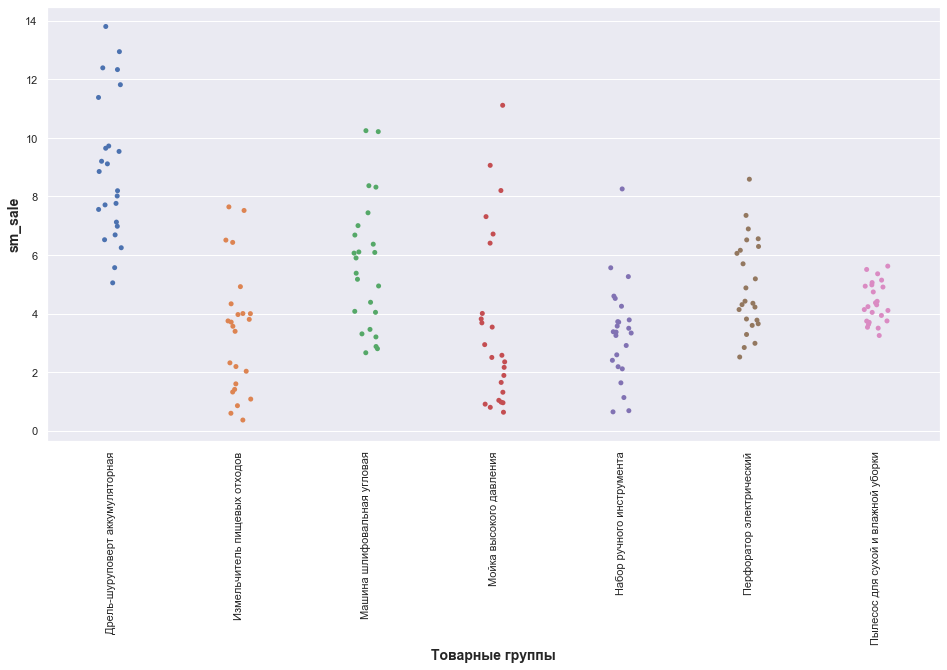

In [507]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

g = sns.stripplot(x = "product_group", y = "sm_sale", data = df10, jitter = True)
plt.xlabel('–¢–æ–≤–∞—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã', fontsize = 14, weight = 'bold')
plt.ylabel('sm_sale', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 90)
plt.show()

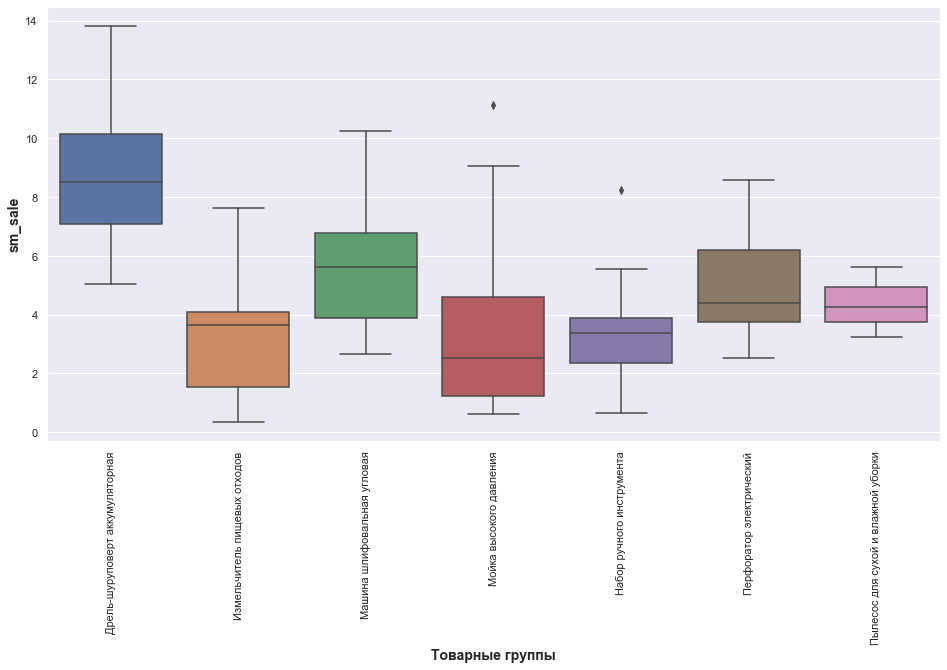

In [508]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

g = sns.boxplot(x = "product_group", y = "sm_sale", data = df10)
plt.xlabel('–¢–æ–≤–∞—Ä–Ω—ã–µ –≥—Ä—É–ø–ø—ã', fontsize = 14, weight = 'bold')
plt.ylabel('sm_sale', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 90)
plt.show()

## –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ —Ç–æ–≤–∞—Ä–∞–º
### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ—Å–Ω–æ–≤–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã

In [509]:
# Cross Join:  –í—Å–µ —Ç–æ–≤–∞—Ä—ã * –í—Å–µ –ø–µ—Ä–∏–æ–¥—ã
df_forecast = df_data.groupby(['product_group', 'model', 'status_purchase'], as_index = False).\
                            agg({'sm_sale': 'sum'}).drop('sm_sale', axis = 1)
df_forecast = df_forecast.assign(temp = 1).merge(df_period.assign(temp = 1)).drop('temp', 1)
df_forecast.head(5)

# –î–∞–Ω–Ω—ã–µ –ø–æ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–æ–¥–∞–∂–∞–º
df_forecast = df_forecast.merge(df_data[['model', 'period_id', 'sm_sale', 'sm_sale_correct', 'sm_sale_clean']],
                                on = ['model', 'period_id'], how = 'left')
df_forecast['x'] = df_forecast['period_id']
df_forecast['y'] = df_forecast['sm_sale_clean']

# –ò–Ω–¥–µ–∫—Å—ã —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
if not 'season_index' in df_forecast.columns:
    df_forecast = df_forecast.merge(df_season, on = ['product_group', 'mn'], how = 'left')

    # –î–ª—è —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –Ω–µ –Ω–∞–π–¥–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ –ø–æ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ —Å –Ø–Ω–¥–µ–∫—Å–∞, –ø—Ä–∏–º–µ–Ω—è—é –æ–±—â—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å "Common"
    df_1 = df_season.loc[df_season['product_group'] == 'Common', ['mn', 'season_index']].\
                            rename(columns = {'season_index': 'season_index_common'})

    df_forecast = df_forecast.merge(df_1, on = ['mn'], how = 'left')
    df_forecast.loc[df_forecast['season_index'].isnull(), 'season_index'] = df_forecast['season_index_common']

print('–ü—Ä–∏–º–µ—Ä —Ç–∞–±–ª–∏—Ü—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞')
df_forecast.head(10)

–ü—Ä–∏–º–µ—Ä —Ç–∞–±–ª–∏—Ü—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞


product_group     model status_purchase  yr_number    yr  mn  \
0  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2018  10   
1  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2018  11   
2  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2018  12   
3  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   1   
4  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   2   
5  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   3   
6  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   4   
7  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   5   
8  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   6   
9  –ê–ø–ø–∞—Ä–∞—Ç –¥–ª—è —Å–≤–∞—Ä–∫–∏ —Ç—Ä—É–±  BRS-1000       –î–ï–ô–°–¢–í–£–ï–¢          1  2019   7   

     yr_mn  period_id  flg_plan   sm_sale  sm_sale_correct  sm_sale_clean   x  \
0  2018-10          1         0  0.149421         0.149421       0.158638   1   
1  2018-11          2         0  0.033714         0.033714       0.036275   2   
2  2018-12          3         0  0.015363         0.090580       0.101650   3   
3  2019-01          4         0  0.000000         0.000000       0.000000   4   
4  2019-02          5         0  0.113777         0.113777       0.121466   5   
5  2019-03          6         0  0.081622         0.081622       0.084086   6   
6  2019-04          7         0  0.116683         0.116683       0.121229   7   
7  2019-05          8         0  0.118022         0.118022       0.110632   8   
8  2019-06          9         0  0.099506         0.099506       0.081898   9   
9  2019-07         10         0  0.137720         0.137720       0.132665  10   

          y  season_index  season_index_common  
0  0.158638        0.9419                 1.04  
1  0.036275        0.9294                 1.04  
2  0.101650        0.8911                 0.96  
3  0.000000        0.9761                 0.72  
4  0.121466        0.9367                 0.84  
5  0.084086        0.9707                 0.96  
6  0.121229        0.9625                 0.99  
7  0.110632        1.0668                 1.07  
8  0.081898        1.2150                 1.23  
9  0.132665        1.0381                 1.13

### –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [510]:
def get_coef(x, y):
    
    b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
    a = np.mean(y) - b * np.mean(x)
    
    if (np.std(y) == 0):
        r = 0
    else:
        r = b * np.std(x) / np.std(y)
        
    R2 = r**2

    return [a, b, R2]

In [511]:
# –ø–µ—Ä–µ–±–æ—Ä –≤—Å–µ—Ö —Ç–æ–≤–∞—Ä–æ–≤
#   - –ø–æ–∏—Å–∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
#   - —Ä–∞—Å—á–µ—Ç –ª–∏–Ω–∏–∏ —Ç—Ä–µ–Ω–¥–∞
#   - —Ä–∞—Å—á–µ—Ç –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –≥–æ–¥
print('\033[1m\033[4m–ü–µ—Ä–≤—ã–µ 10 —Ç–æ–≤–∞—Ä–æ–≤:\n\033[0m')
count = df_products_stat.shape[0]
i = 0
for index, row in df_products_stat.iterrows():
    i += 1
    mdl = df_products_stat.loc[index, 'model']

    x = df_forecast.loc[ (df_forecast['model'] == mdl) & (df_forecast['flg_plan'] == 0), 'period_id']
    y = df_forecast.loc[ (df_forecast['model'] == mdl) & (df_forecast['flg_plan'] == 0), 'sm_sale_clean']

    list_coef = get_coef(x, y)

    a  = round(list_coef[0], 6)
    b  = round(list_coef[1], 6)
    R2 = round(list_coef[2], 6)

    # –≤—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö 10-—Ç–∏ —Ç–æ–≤–∞—Ä–æ–≤
    if i <= 10:
        print(f'\033[1m{i}. {mdl}\n\ty = {round(a, 6)} + {round(b, 6)}*x;\tR2 = {round(R2, 6)}')
    elif i == 11:
        print('...')

    df_forecast.loc[ df_forecast['model'] == mdl, 'a'] = a
    df_forecast.loc[ df_forecast['model'] == mdl, 'b'] = b
    df_forecast.loc[ df_forecast['model'] == mdl, 'R2'] = R2
    df_forecast.loc[ df_forecast['model'] == mdl, 'sm_trend'] = df_forecast['a'] + df_forecast['b'] * df_forecast['period_id']

    df_forecast.loc[ (df_forecast['model'] == mdl) & (df_forecast['period_id'] == 24), 'sm_forecast'] = \
                    df_forecast['sm_sale']
    df_forecast.loc[ (df_forecast['model'] == mdl) & (df_forecast['flg_plan'] == 1), 'sm_forecast'] = \
                        df_forecast['sm_trend'] * df_forecast['season_index']
    
# –æ–±–Ω—É–ª—è—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –∏ –ø—Ä–æ–≥–Ω–æ–∑ –ø–æ —Ç–æ–≤–∞—Ä–∞–º, –≤—ã–≤–µ–¥–µ–Ω–Ω—ã–º –∏–∑ –º–∞—Ç—Ä–∏—Ü—ã
df_forecast.loc[ df_forecast['sm_forecast'] < 0, 'sm_forecast'] = 0
df_forecast.loc[ df_forecast['status_purchase'] == '–û–¢–ú–ï–ù–ï–ù', 'sm_forecast'] = 0

–ü–µ—Ä–≤—ã–µ 10 —Ç–æ–≤–∞—Ä–æ–≤:

1. BAB-18UX2LI-FDK
	y = 2.468123 + -0.065779*x;	R2 = 0.338962
2. BWS-905-R
	y = 1.202882 + 0.003832*x;	R2 = 0.006048
3. BHD-800N
	y = 1.359211 + -0.017305*x;	R2 = 0.043166
4. BTK-123
	y = 0.740449 + 0.035832*x;	R2 = 0.277545
5. BAB-12-P
	y = 1.000884 + 0.013038*x;	R2 = 0.028836
6. BHD-700-P
	y = 0.580692 + 0.035762*x;	R2 = 0.189348
7. BSS-1220-PRO
	y = 0.928048 + 0.011342*x;	R2 = 0.037204
8. BAB-14UX2LI-FDK
	y = 1.44498 + -0.041214*x;	R2 = 0.384382
9. TITAN MAX POWER
	y = 0.298152 + 0.039311*x;	R2 = 0.472808
10. BAB-10,8-P
	y = 1.196437 + -0.0343*x;	R2 = 0.540316
...


### –ü—Ä–æ–≥–Ω–æ–∑ - –ò—Ç–æ–≥–∏ –ø–æ —Ç–æ–≤–∞—Ä–Ω—ã–º –≥—Ä—É–ø–ø–∞–º

In [513]:
df_forecast_groups = df_forecast.groupby(['product_group', 'yr_number', 'yr_mn', 'period_id', 'flg_plan'], 
                                            as_index = False).agg(
                                        {
                                            'sm_sale':         'sum', 
                                            'sm_sale_correct': 'sum', 
                                            'sm_sale_clean':   'sum', 
                                            'sm_trend':        'sum',   
                                            'sm_forecast':     'sum'
                                        }
)
df_forecast_groups.loc[df_forecast_groups['flg_plan'] == 1, 'sm_sale'] = None
df_forecast_groups.loc[df_forecast_groups['flg_plan'] == 1, 'sm_sale_correct'] = None
df_forecast_groups.loc[df_forecast_groups['flg_plan'] == 1, 'sm_sale_clean'] = None

df_forecast_groups.loc[(df_forecast_groups['flg_plan'] == 0) & (df_forecast_groups['period_id'] != 24), 'sm_forecast'] = None

### –ü—Ä–æ–≥–Ω–æ–∑ - –ò—Ç–æ–≥ –ø–æ –≤—Å–µ–π –∫–æ–º–ø–∞–Ω–∏–∏

In [514]:
df_forecast_total = df_forecast.groupby(['yr_number', 'yr_mn', 'period_id', 'flg_plan'], as_index = False).agg(
    {
        'sm_sale':         'sum', 
        'sm_sale_correct': 'sum', 
        'sm_sale_clean':   'sum', 
        'sm_trend':        'sum',   
        'sm_forecast':     'sum',
        'season_index':    'mean'
    }
)
df_forecast_total['sm_trend_season'] = round(df_forecast_total['sm_trend'] / df_forecast_total['season_index'], 6)
df_forecast_total.loc[ df_forecast_total['flg_plan'] == 1, 'sm_sale'] = None
df_forecast_total.loc[ df_forecast_total['flg_plan'] == 1, 'sm_sale_correct'] = None
df_forecast_total.loc[ df_forecast_total['flg_plan'] == 1, 'sm_sale_clean'] = None

df_forecast_total.loc[ (df_forecast_total['flg_plan'] == 0) & (df_forecast_total['period_id'] != 24), 'sm_forecast'] = None
df_forecast_total.head(36)

yr_number    yr_mn  period_id  flg_plan    sm_sale  sm_sale_correct  \
0           1  2018-10          1         0  48.543108        50.978933   
1           1  2018-11          2         0  53.094500        51.893072   
2           1  2018-12          3         0  37.721107        38.173512   
3           1  2019-01          4         0  33.142238        34.382203   
4           1  2019-02          5         0  50.660951        53.438512   
5           1  2019-03          6         0  37.592245        42.664624   
6           1  2019-04          7         0  52.646438        53.750761   
7           1  2019-05          8         0  51.390530        56.618597   
8           1  2019-06          9         0  47.199222        51.792355   
9           1  2019-07         10         0  61.565291        65.242901   
10          1  2019-08         11         0  65.346725        68.862418   
11          1  2019-09         12         0  56.462029        62.682770   
12          2  2019-10         13         0  48.238718        56.081369   
13          2  2019-11         14         0  53.884875        58.974245   
14          2  2019-12         15         0  50.136043        56.134854   
15          2  2020-01         16         0  45.401990        50.734641   
16          2  2020-02         17         0  61.160600        66.373684   
17          2  2020-03         18         0  58.264878        65.018076   
18          2  2020-04         19         0  54.391104        55.779110   
19          2  2020-05         20         0  60.970039        65.370358   
20          2  2020-06         21         0  79.327952        84.577574   
21          2  2020-07         22         0  82.520303        82.869533   
22          2  2020-08         23         0  82.815775        82.406208   
23          2  2020-09         24         0  69.312671        77.113596   
24          3  2020-10         25         1        NaN              NaN   
25          3  2020-11         26         1        NaN              NaN   
26          3  2020-12         27         1        NaN              NaN   
27          3  2021-01         28         1        NaN              NaN   
28          3  2021-02         29         1        NaN              NaN   
29          3  2021-03         30         1        NaN              NaN   
30          3  2021-04         31         1        NaN              NaN   
31          3  2021-05         32         1        NaN              NaN   
32          3  2021-06         33         1        NaN              NaN   
33          3  2021-07         34         1        NaN              NaN   
34          3  2021-08         35         1        NaN              NaN   
35          3  2021-09         36         1        NaN              NaN   

    sm_sale_clean    sm_trend  sm_forecast  season_index  sm_trend_season  
0       56.158655   42.904155          NaN      0.932103        46.029399  
1       58.299882   44.925857          NaN      0.928305        48.395590  
2       43.429181   46.947559          NaN      0.907841        51.713393  
3       41.275306   48.969261          NaN      0.854648        57.297580  
4       53.072955   50.990963          NaN      0.998452        51.070019  
5       45.020384   53.012665          NaN      0.945619        56.061312  
6       56.707228   55.034367          NaN      0.923373        59.601430  
7       54.894800   57.056069          NaN      1.036015        55.072608  
8       45.451648   59.077771          NaN      1.142400        51.713735  
9       54.953657   61.099473          NaN      1.184268        51.592585  
10      57.957236   63.121175          NaN      1.197618        52.705586  
11      66.177992   65.142877          NaN      0.949356        68.617989  
12      61.161410   67.164579          NaN      0.932103        72.057013  
13      66.251117   69.186281          NaN      0.928305        74.529706  
14      62.950701   71.207983          NaN      0.907841        78.436590  
15      60.8

### –§—É–Ω–∫—Ü–∏—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞ –û–±–æ—Ä–æ—Ç–∞ (—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ, —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ, –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏, –ª–∏–Ω–∏–∏ —Ç—Ä–µ–Ω–¥–∞ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –≥–æ–¥)

In [515]:
def chart_sales_dynamics(a_type, a_filter = ''):

    example_model = ''
    example_group = ''

    if (a_type == 'product'):
        
        df_example    = df_forecast.loc[ df_forecast['model'] == a_filter.upper()]
        example_group = df_example['product_group'].unique()[0]
        example_model = df_example['model'].unique()[0]
        caption = '–¢–æ–≤–∞—Ä: '+ example_group + ' ' + example_model
        
    elif (a_type == 'group'):
        
        df_example = df_forecast_groups.loc[ df_forecast_groups['product_group'] == a_filter]
        caption = '–¢–æ–≤–∞—Ä–Ω–∞—è –≥—Ä—É–ø–ø–∞: ' + df_example['product_group'].unique()[0]
        
    else:

        df_example = df_forecast_total
        caption = '–í—Å—è –∫–æ–º–ø–∞–Ω–∏—è'
        
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 6)
    plt.xticks(rotation = 45)

    str_title = f'{caption}\n–û–±–æ—Ä–æ—Ç –ø–æ –º–µ—Å—è—Ü–∞–º (–º–ª–Ω —Ä—É–±):\n—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–π, —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∏ –æ—á–∏—â–µ–Ω–Ω—ã–π –æ—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏,\
    –ª–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞ –∏ –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π –≥–æ–¥'
    plt.title(str_title, fontsize = 16, weight = 'bold')
    
    
    plt.xlabel('–ú–µ—Å—è—Ü—ã',      fontsize = 12, weight = 'bold')
    plt.ylabel('–û–±–æ—Ä–æ—Ç, –º–ª–Ω —Ä—É–±', fontsize = 12, weight = 'bold')

    plt.plot('yr_mn', 'sm_sale',         data = df_example, color = 'black',   linestyle = '-',  linewidth = 2)
    plt.plot('yr_mn', 'sm_sale_correct', data = df_example, color = 'hotpink', linestyle = '--', linewidth = 4)
    plt.plot('yr_mn', 'sm_sale_clean',   data = df_example, color = 'green',   linestyle = ':',  linewidth = 6)
    plt.plot('yr_mn', 'sm_trend',        data = df_example, color = 'red',     linestyle = '-',  linewidth = 2)
    plt.plot('yr_mn', 'sm_forecast',     data = df_example, color = 'blue',    linestyle = ':',  linewidth = 6)

    plt.legend()
    plt.show()

## –ì—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–¥–∞–∂ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ —Ç—Ä–µ—Ö —Ç–æ–≤–∞—Ä–æ–≤ (—Å–ø–∞–¥, —Ä–æ—Å—Ç, —Å–∏–ª—å–Ω—ã–π —Ä–æ—Å—Ç –ø—Ä–æ–¥–∞–∂)

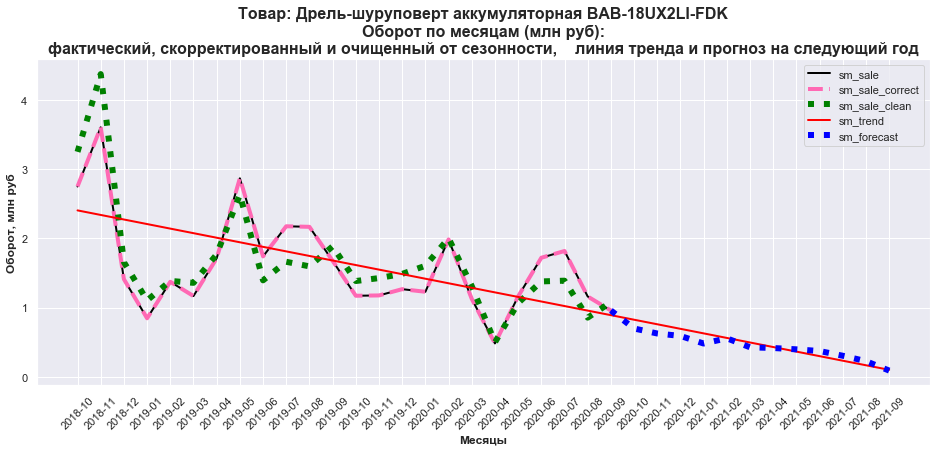

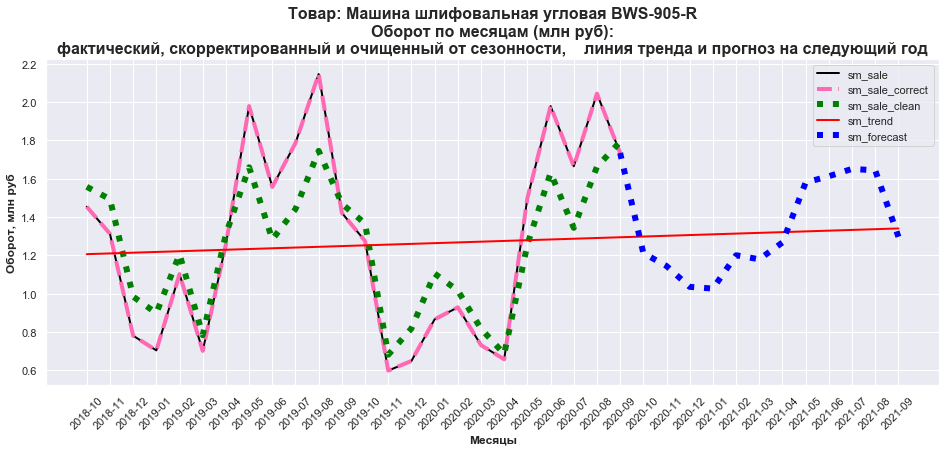

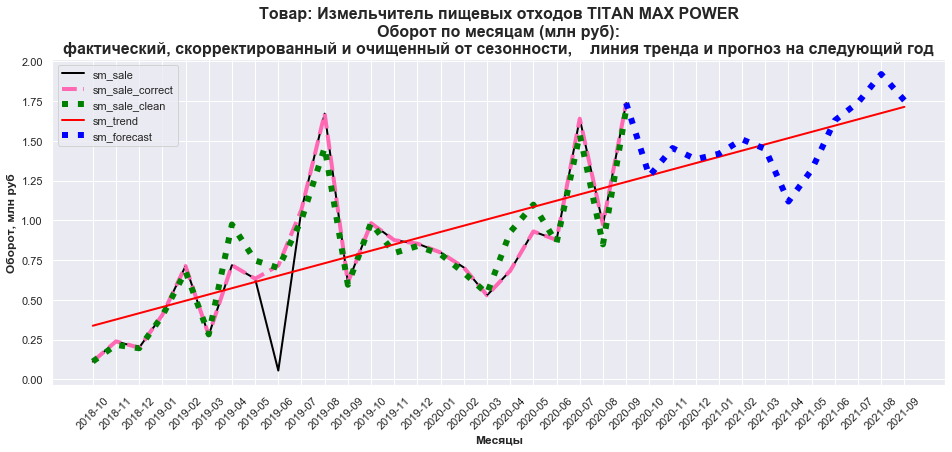

In [516]:
chart_sales_dynamics('product', 'BAB-18UX2LI-FDK')
chart_sales_dynamics('product', 'BWS-905-R')
chart_sales_dynamics('product', 'TITAN MAX POWER')

#'BHR-1900-PRO'
#'BSR-12H'
#'BHR-1600-SC'
#'BSS-550-R'
#'BLN-15-K'
#'COMPACT +'
#'BWS-905-R'
#'BAB-18UX2LI-FDK'
#'TITAN 4000 (CONTROL)'

## –ì—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–¥–∞–∂ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ —Ç—Ä–µ—Ö —Ç—Ä–µ—Ö —Ç–æ–≤–∞—Ä–Ω—ã—Ö –≥—Ä—É–ø–ø (—Å–ø–∞–¥, —Ä–æ—Å—Ç, —Å–∏–ª—å–Ω—ã–π —Ä–æ—Å—Ç –ø—Ä–æ–¥–∞–∂)

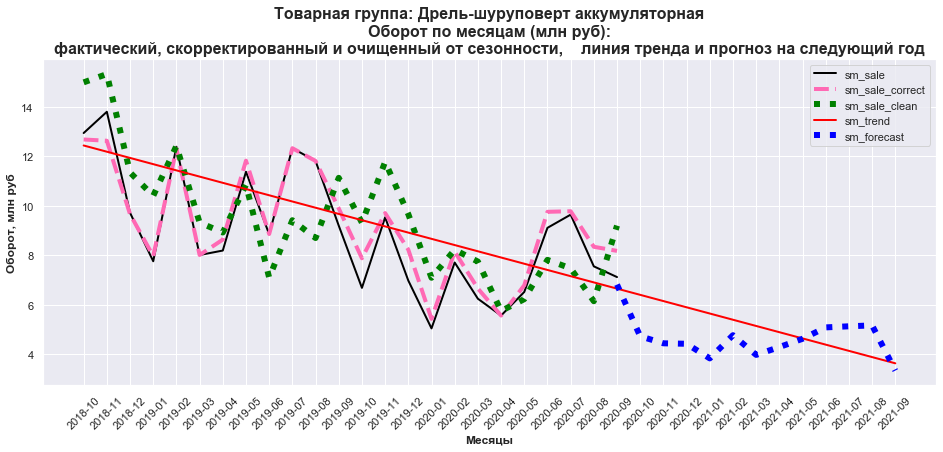

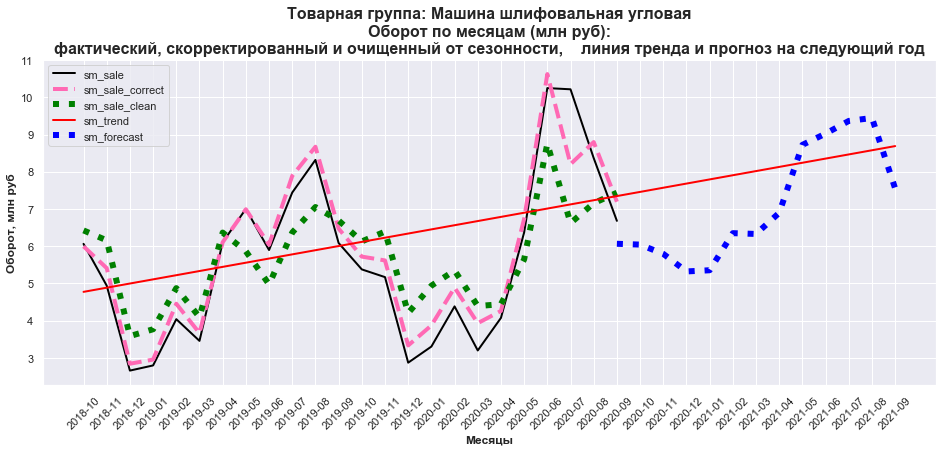

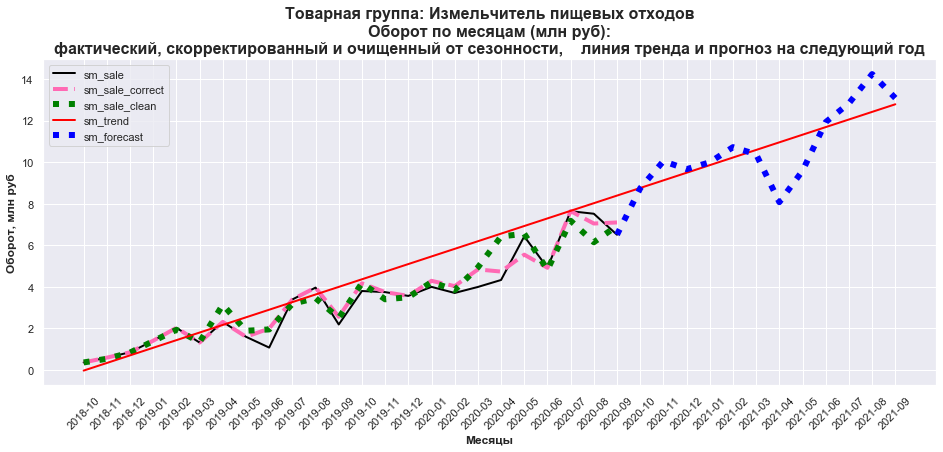

In [517]:
chart_sales_dynamics('group', '–î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è')
chart_sales_dynamics('group', '–ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è')
chart_sales_dynamics('group', '–ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤')

#'–î—Ä–µ–ª—å-—à—É—Ä—É–ø–æ–≤–µ—Ä—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–Ω–∞—è'
#'–ú–∞—à–∏–Ω–∞ —à–ª–∏—Ñ–æ–≤–∞–ª—å–Ω–∞—è —É–≥–ª–æ–≤–∞—è'
#'–ì–∞–π–∫–æ–≤–µ—Ä—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–π'
#'–ú–æ–π–∫–∞ –≤—ã—Å–æ–∫–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è'
#'–ü—ã–ª–µ—Å–æ—Å –¥–ª—è —Å—É—Ö–æ–π –∏ –≤–ª–∞–∂–Ω–æ–π —É–±–æ—Ä–∫–∏'
#'–ò–∑–º–µ–ª—å—á–∏—Ç–µ–ª—å –ø–∏—â–µ–≤—ã—Ö –æ—Ç—Ö–æ–¥–æ–≤'
#'–ù–∞–±–æ—Ä —Ä—É—á–Ω–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞'

## –ì—Ä–∞—Ñ–∏–∫ –æ–±–æ—Ä–æ—Ç–∞ –∏ –û—Å–Ω–æ–≤–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∞ –ø–æ –≤—Å–µ–π –∫–æ–º–ø–∞–Ω–∏–∏

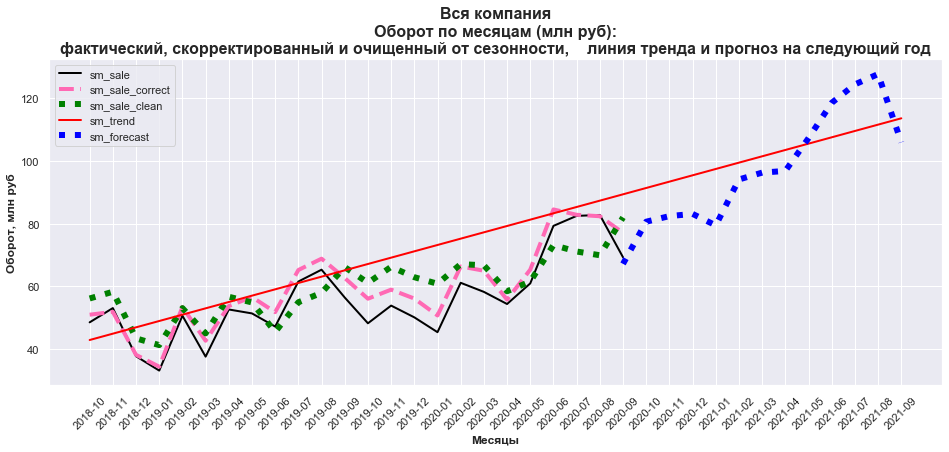

In [518]:
chart_sales_dynamics('company', '')

### –¢–∞–±–ª–∏—Ü–∞ - –û–±—â–∏–µ –∏—Ç–æ–≥–∏ –ø–æ –≥–æ–¥–∞–º (–û–±–æ—Ä–æ—Ç —Ñ–∞–∫—Ç –∏ –ü—Ä–æ–≥–Ω–æ–∑)

In [519]:
df_total_sm = df_forecast.groupby(['yr_number'], as_index = False).agg({
                                                                            'yr_mn':       ['min', 'max'],
                                                                            'sm_sale':     'sum', 
                                                                            'sm_forecast': 'sum'
                                                                        })

df_total_sm = df_total_sm.droplevel(1, axis=1)
df_total_sm.columns = ['yr_number', 'min_month', 'max_month', 'sm_sale', 'sm_forecast']
df_total_sm['period'] = df_total_sm['min_month'] + ' - ' + df_total_sm['max_month']

df_total_sm.loc[ df_total_sm['yr_number'] <= 2, 'sm_forecast'] = None
df_total_sm.loc[ df_total_sm['yr_number'] == 3, 'sm_sale']     = None

df_total_sm = df_total_sm[['yr_number', 'period', 'sm_sale', 'sm_forecast']]
df_total_sm

yr_number             period     sm_sale  sm_forecast
0          1  2018-10 - 2019-09  595.364384          NaN
1          2  2019-10 - 2020-09  746.424948          NaN
2          3  2020-10 - 2021-09         NaN  1197.296465

### –ì—Ä–∞—Ñ–∏–∫ - –û–±—â–∏–µ –∏—Ç–æ–≥–∏ –ø–æ –≥–æ–¥–∞–º (–û–±–æ—Ä–æ—Ç —Ñ–∞–∫—Ç –∏ –ü—Ä–æ–≥–Ω–æ–∑)

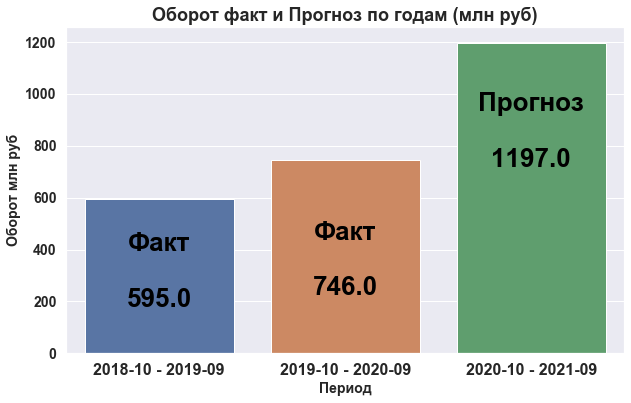

In [520]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

g1 = sns.barplot(x = 'period', y = 'sm_sale',     data = df_total_sm)
g2 = sns.barplot(x = 'period', y = 'sm_forecast', data = df_total_sm)

plt.xlabel('–ü–µ—Ä–∏–æ–¥',     fontsize = 14, weight = 'bold')
plt.ylabel('–û–±–æ—Ä–æ—Ç –º–ª–Ω —Ä—É–±', fontsize = 14, weight = 'bold')
plt.title(f'–û–±–æ—Ä–æ—Ç —Ñ–∞–∫—Ç –∏ –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ –≥–æ–¥–∞–º (–º–ª–Ω —Ä—É–±)', fontsize = 18, weight = 'bold')

plt.xticks(fontsize = 16, weight = 'bold')
plt.yticks(fontsize = 14, weight = 'bold')

for index, row in df_total_sm.iterrows():
    if index < 2:
        g1.text(row.name, row.sm_sale * 0.3, '–§–∞–∫—Ç\n\n' + str(round(row.sm_sale, 0)), 
               color = 'black', ha = "center", weight = 'bold', size = 26)

for index, row in df_total_sm.iterrows():
    if index > 1:
        g2.text(row.name, row.sm_forecast * 0.6, '–ü—Ä–æ–≥–Ω–æ–∑\n\n' + str(round(row.sm_forecast, 0)), 
           color = 'black', ha = "center", weight = 'bold', size = 26)
plt.show()

## –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã –∏ –æ—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ 

### –û—Ü–µ–Ω–∫–∞ —Ç—Ä–µ—Ö –º–æ–¥–µ–ª–µ–π, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è—Ö: sm_sale, sm_sale_correct, sm_sale_clean

In [521]:
s = '\033[1m'
print()
x = np.arange(1, 25)

y = df_forecast_total.loc[df_forecast_total['sm_sale'].notnull(), 'sm_sale']
res = get_coef(x, y)
print(f'{s}–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale:         y = {round(res[0], 6)}  + {round(res[1], 6)}  * x;\t R2 = {round(res[2], 6)}')

y = df_forecast_total.loc[df_forecast_total['sm_sale'].notnull(), 'sm_sale_correct']
res = get_coef(x, y)
print(f'{s}–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale_correct: y = {round(res[0], 6)} + {round(res[1], 6)} * x;\t R2 = {round(res[2], 6)}')

y = df_forecast_total.loc[df_forecast_total['sm_sale'].notnull(), 'sm_sale_clean']
res = get_coef(x, y)
print(f'{s}–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale_clean:   y = {round(res[0], 6)} + {round(res[1], 6)} * x;\t R2 = {round(res[2], 6)}')


–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale:         y = 38.79589  + 1.36896  * x;	 R2 = 0.548305
–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale_correct: y = 41.095629 + 1.485396 * x;	 R2 = 0.633812
–ú–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ sm_sale_clean:   y = 45.658735 + 1.130084 * x;	 R2 = 0.648724


### –í —Ü–µ–ª–æ–º –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≥—Ä—É–±–∞—è 
1. –¢–∞–∫ –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö, –Ω–µ –æ—á–∏—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –¥–ª—è –º–æ–¥–µ–ª–∏, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ **sm_sale**, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:  
**R2 = 0.548**  


2. –° –ø–æ–º–æ—â—å—é –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∏ "–ø–ª–æ—Ö–∏—Ö" –¥–∞–Ω–Ω—ã—Ö (–æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è —Ç–æ–≤–∞—Ä–∞ –Ω–∞ —Å–∫–ª–∞–¥–µ –∏ —Ä–µ–∑–∫–∏—Ö –≤—ã–±—Ä–æ—Å–æ–≤), –º–æ–¥–µ–ª—å, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ **sm_sale_correct** –æ–∫–∞–∑–∞–ª–∞—Å—å –ª—É—á—à–µ –∏ –µ–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:  
**R2 = 0.634**  


3. –ü–æ—Å–ª–µ –¥–∞–ª—å–Ω–µ–π—à–µ–π –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –æ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏, –º–æ–¥–µ–ª—å –Ω–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ **sm_sale_clean** –±—ã–ª–∞ –µ—â–µ –Ω–µ–º–Ω–æ–≥–æ —É–ª—É—á—à–µ–Ω–∞ –¥–æ   
**R2 = 0.648**



### –ù–æ –µ—Å–ª–∏ —É–≥–ª—É–±–ª—è—Ç—å—Å—è –¥–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, —Ç–æ —Ä–∞–∑–±—Ä–æ—Å –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ R2 –ø–æ–ª—É—á–∏–ª—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–π

In [522]:
cnt_les_30  = df_forecast.loc[ df_forecast['R2'] < 0.3,  'model'].nunique()
cnt_les_50  = df_forecast.loc[ df_forecast['R2'] < 0.5,  'model'].nunique()
cnt_more_50 = df_forecast.loc[ df_forecast['R2'] >= 0.5, 'model'].nunique()
cnt_more_70 = df_forecast.loc[ df_forecast['R2'] >= 0.7, 'model'].nunique()
cnt_more_90 = df_forecast.loc[ df_forecast['R2'] >= 0.9, 'model'].nunique()

In [523]:
cnt_total = 273
print(f'{s}–¢–∞–∫ –∏–∑ {cnt_total}-—Ö —Ç–æ–≤–∞—Ä–æ–≤')
print(f'{s}\tR2 –º–µ–Ω—å—à–µ 0.3 —É {cnt_les_30} —Ç–æ–≤–∞—Ä–æ–≤ {int(cnt_les_30 / cnt_total * 100)}%')
print(f'{s}\tR2 –º–µ–Ω—å—à–µ 0.5 —É {cnt_les_50} —Ç–æ–≤–∞—Ä–æ–≤ {int(cnt_les_50 / cnt_total * 100)}%')
print(f'{s}\tR2 –±–æ–ª—å—à–µ 0.5 —É  {cnt_more_50} —Ç–æ–≤–∞—Ä–æ–≤ {int(cnt_more_50 / cnt_total * 100)}%')
print(f'{s}\tR2 –±–æ–ª—å—à–µ 0.7 —É  {cnt_more_70} —Ç–æ–≤–∞—Ä–æ–≤ {int(cnt_more_70 / cnt_total * 100)}%')
print(f'{s}\tR2 –±–æ–ª—å—à–µ 0.9 —É  {cnt_more_90} —Ç–æ–≤–∞—Ä–æ–≤ {int(cnt_more_90 / cnt_total * 100)}%')


–¢–∞–∫ –∏–∑ 273-—Ö —Ç–æ–≤–∞—Ä–æ–≤
	R2 –º–µ–Ω—å—à–µ 0.3 —É 154 —Ç–æ–≤–∞—Ä–æ–≤ 56%
	R2 –º–µ–Ω—å—à–µ 0.5 —É 199 —Ç–æ–≤–∞—Ä–æ–≤ 72%
	R2 –±–æ–ª—å—à–µ 0.5 —É  74 —Ç–æ–≤–∞—Ä–æ–≤ 27%
	R2 –±–æ–ª—å—à–µ 0.7 —É  64 —Ç–æ–≤–∞—Ä–æ–≤ 23%
	R2 –±–æ–ª—å—à–µ 0.9 —É  61 —Ç–æ–≤–∞—Ä–æ–≤ 22%


### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏

In [524]:
y = df_forecast_total.loc[df_forecast_total['sm_sale'].notnull(), 'sm_sale_clean']
y_pred = df_forecast_total.loc[df_forecast_total['sm_sale'].notnull(), 'sm_trend']
A_mean = round(100 * np.mean(np.abs((y - y_pred) / y)), 2)

print(f'{s}–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ A(—Å—Ä) = {A_mean}%')

–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ A(—Å—Ä) = 15.19%


–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ A(—Å—Ä) = 15.19%.  
–≠—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ö—É–∂–µ –æ–±—â–µ–ø—Ä–∏–Ω—è—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è —Ö–æ—Ä–æ—à–µ–π –º–æ–¥–µ–ª–∏ 8-10%.  
–ù–æ, –≤ —Ü–µ–ª–æ–º, —Ç–∞–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —è–≤–ª—è–µ—Ç—Å—è –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω—ã–º.

### –î–ª—è –æ—Ü–µ–Ω–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤—ã—á–∏—Å–ª—è–µ—é F-–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞, —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ  ùêπ-–∫—Ä–∏—Ç–µ—Ä–∏—è (ùêπ—Ñ–∞–∫—Ç):

In [525]:
n = len(x)
R2 = res[2]
F_fact = (R2 * (n - 2)) / (1 - R2)
print(f'{s}\t–ö—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞ F(fact) = {round(F_fact, 2)}')
print(f'{s}\t–ö—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞ F(—Ç–µ–æ—Ä) = 4.30')
print(f'{s}\t{round(F_fact, 2)} > 4.30 => —É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ')

	–ö—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞ F(fact) = 40.63
	–ö—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞ F(—Ç–µ–æ—Ä) = 4.30
	40.63 > 4.30 => —É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ


#### –û–ø—Ä–µ–¥–µ–ª—è—é —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –æ—à–∏–±–∫—É (s_residual) –∏ —Å–ª—É—á–∞–π–Ω—ã–µ –æ—à–∏–±–∫–∏ ùëöùëé, ùëöùëè

In [526]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print(f'{s}–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –∏ —Å–ª—É—á–∞–π–Ω—ã–µ –æ—à–∏–±–∫–∏:')
print(f'{s}\ts_residual = {round(s_residual, 6)}\n\tm_a = {round(m_a, 6)}\n\tm_b = {round(m_b, 6)}')

–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –∏ —Å–ª—É—á–∞–π–Ω—ã–µ –æ—à–∏–±–∫–∏:
	s_residual = 11.043327
	m_a = 4.653111
	m_b = 0.32565


### –í—ã—á–∏c–ª—è—é –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è ùë°ùëé  –∏  ùë°ùëè 

In [527]:
a = res[0]
b = res[1]

t_a = a / m_a
t_b = b / m_b

print(f'{s}–ù–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è ùë°ùëé –∏ ùë°ùëè:')
print(f'{s}\t t_a = {round(t_a, 6)}')
print(f'{s}\t t_b = {round(t_b, 6)}')

–ù–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è ùë°ùëé –∏ ùë°ùëè:
	 t_a = 9.812518
	 t_b = 3.470241


–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –±–æ–ª—å—à–µ —Ç–∞–±–ª–∏—á–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è:  

* ùë°ùëé = 8.8807 > ùë°–∫—Ä=2.074, ùë°ùëè = 3.1407 > ùë°–∫—Ä = 2.074,  
* –ø–æ—ç—Ç–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ùëé –∏ ùëè –Ω–µ —Å–ª—É—á–∞–π–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –Ω—É–ª—è,   
* —Ç–æ –µ—Å—Ç—å –æ–Ω–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã.  

### –°—á–∏—Ç–∞—é –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏  ùëé  –∏  ùëè . 

In [528]:
t_cr = 2.074

delta_a = t_cr * m_a
delta_b = t_cr * m_b

gamma_a_min = a - delta_a
gamma_a_max = a + delta_a

gamma_b_min = b - delta_b
gamma_b_max = b + delta_b

print(f'{s}–ú–æ–¥–µ–ª—å:   y = {round(res[0], 6)} + {round(res[1], 6)} * x;\t R2 = {round(res[2], 6)}')
print(f'{s}–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:')
print(f'{s}\t–¥–ª—è a: [{round(gamma_a_min, 6)}, {round(gamma_a_max, 6)}]')
print(f'{s}\t–¥–ª—è b: [{round(gamma_b_min, 6)}, {round(gamma_b_max, 6)}]')

–ú–æ–¥–µ–ª—å:   y = 45.658735 + 1.130084 * x;	 R2 = 0.648724
–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
	–¥–ª—è a: [36.008182, 55.309287]
	–¥–ª—è b: [0.454686, 1.805482]
